In [2]:
import numpy as np
import matplotlib.pyplot as plt

class image_unit:
    def __init__(self) -> None:
        self.num_of_points = 0
        self.cord_of_points = np.array([])
        self.raw_image = np.array([])
    def print_data(self) -> None:
        print(self.num_of_points)
        print(self.cord_of_points)
        print(self.raw_image)
        # Plotting the array as a grayscale image
        plt.imshow(self.raw_image, cmap='viridis')
        plt.colorbar()  # Adding a colorbar to show intensity scale
        plt.title('Visualization')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

In [3]:
# For every image:
# Line 1: number of points(10)
# Line 2-11: exact positions of the points
# Others: grayscale image
def read_in_data(file_path:str) -> list:
    with open(file_path, 'r') as file:
        _images_ = []
        cop = [] # Store cordinates of points tempoarily
        ri = [] # Store raw image tempoarily
        #i = 0 #debug
        for line in file:
            numbers = []
            numbers = [float(s) for s in line.strip().split()]
            #i += 1
            #print('data', i)
            #print(len(numbers)) #debug
            if len(numbers) == 1:
                if len(_images_) > 0:
                    _images_[-1].raw_image = np.array(ri).T
                    ri.clear()
                _images_.append(image_unit())
                _images_[-1].num_of_points = int(numbers[0])
            elif len(numbers) == 2:
                cop.append(numbers)
                if len(cop) == _images_[-1].num_of_points:
                    _images_[-1].cord_of_points = np.array(cop)
                    _images_[-1].cord_of_points = _images_[-1].cord_of_points
                    cop.clear()
            else:
                ri.append(numbers)
        _images_[-1].raw_image = np.array(ri).T
        return _images_

In [4]:
import cv2

# Define the color (B, G, R) and thickness of the cross marks
# color = (0, 255, 0)  # Green color
# cross_length = 10  # Length of the cross arms
# thickness = 2  # Thickness of the lines
def mark_point(image: np.array, points: list, color = (0, 255, 0), type = 'normal', cross_length = 2, thickness = 1) -> np.array:
    # Ensure the image is a NumPy array with the correct dtype
    if image.dtype != np.uint8:
        marked_image = (image / np.max(image) * 255).astype(np.uint8)
    else:
        marked_image = np.copy(image)
    if len(marked_image.shape) == 2 or (len(marked_image.shape) == 3 and marked_image.shape[2] == 1):
        marked_image = cv2.applyColorMap(marked_image, cv2.COLORMAP_TWILIGHT_SHIFTED)
    if type == 'normal':
        for (x, y) in points:
            cv2.line(marked_image, (x - cross_length, y), (x + cross_length, y), color, thickness)
            cv2.line(marked_image, (x, y - cross_length), (x, y + cross_length), color, thickness)
    elif type == 'skew':
        for (x, y) in points:
            cv2.line(marked_image, (x - cross_length, y - cross_length), (x + cross_length, y + cross_length), color, thickness)
            cv2.line(marked_image, (x + cross_length, y - cross_length), (x - cross_length, y + cross_length), color, thickness)
    # Display the image with marked points
    return marked_image

In [5]:
"""
    Extract a 5x5 subarray centered around the specified data point (center_x, center_y).
    
    Parameters:
    array (numpy.ndarray): The input array from which to extract the subarray.
    center_x (int): The x-coordinate (row) of the center data point.
    center_y (int): The y-coordinate (column) of the center data point.
    
    Returns:
    numpy.ndarray: The extracted 5x5 subarray, or None if the center point is too close to the border.
    """
def extract_subarr(array: np.array, center, half_size = 2): # A 5x5 array by default, half_size is 2
    (center_x, center_y) = center
    left = max(center_x - half_size, 0)
    right = min(center_x + half_size + 1, array.shape[0])
    down = max(center_y - half_size, 0)
    up = min(center_y + half_size + 1, array.shape[1])
    # Extract the 5x5 subarray centered around (center_x, center_y)
    subarray = array[down : up,
                     left : right]
    return subarray

def frac_part(array: np.array, center, half_size = 2):
    sub_arr = extract_subarr(array, center, half_size)
    total_intensity = np.sum(sub_arr)
    result = [- half_size, - half_size]
    if total_intensity == 0:
        return None
    for idx, x in np.ndenumerate(sub_arr):
        result += idx / total_intensity * x
    return result
    

In [6]:
import math
def distance(p, q):
    # Function to calculate Euclidean distance between points p and q
    return math.sqrt((q[0] - p[0])**2 + (q[1] - p[1])**2)

def smallest_distance_to_set(point, point_set):
    # point is a tuple (x, y) representing the point P
    # point_set is a list of tuples [(x1, y1), (x2, y2), ...] representing the set S
    
    if not point_set:
        return float('inf')  # If point_set is empty, return infinity
    
    x_distance = float('inf')
    y_distance = float('inf')
    min_distance = float('inf')
    
    for q in point_set:
        dist = distance(point, q)
        if dist < min_distance:
            min_distance = dist
            x_distance = point[0] - q[0]
            y_distance = point[1] - q[1]
    
    return [x_distance, y_distance, min_distance]

class judge_data:
    def __init__(self) -> None:
        self.dist = []
        self.rev_dist = []
        self.large_error = []
        self.large_error_points = []
        self.not_found = []
        self.not_found_points = []
        self.dist_array = np.array([])
    
    def print_data(self) -> None:
        # Testing code
        print(self.dist)  
        print(self.rev_dist)
        print(self.large_error)
        print(self.large_error_points)
        print(self.not_found)
        print(self.not_found_points)
        print(self.dist_array)
    
    def plot_histogram(self) -> None:
        # Plotting the histogram
        plt.hist(self.dist_array[0], bins=50, edgecolor='black')  # Adjust bins as needed
        plt.title('Histogram of Delta x')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

        plt.hist(self.dist_array[1], bins=50, edgecolor='black')  # Adjust bins as needed
        plt.title('Histogram of Delta y')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

        plt.hist(self.dist_array[2], bins=50, edgecolor='black')  # Adjust bins as needed
        plt.title('Histogram of Delta r')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    
    def show_error(self, _images_: list, _found_: list) -> None:
        for i in range (len(self.large_error)):
            print('Image ' + str(self.large_error[i]) + ' Raw Data')
            print(extract_subarr(_images_[self.large_error[i]].raw_image, self.large_error_points[i]))
            marked_imag = mark_point(_images_[self.large_error[i]].raw_image, [tuple(row) for row in np.round(_found_[self.large_error[i]]).astype(int)])
            marked_imag = mark_point(marked_imag, [tuple(row) for row in np.round(_images_[self.large_error[i]].cord_of_points - 0.5).astype(int)], (255, 0, 0))
            plt.imshow(marked_imag)
            plt.title('Image ' + str(self.large_error[i]) + ' Visualization')
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.show()
        
        for i in range (len(self.not_found)):
            print('Image ' + str(self.not_found[i]) + ' Raw Data')
            print('Not Found:', self.not_found_points[i])
            print(extract_subarr(_images_[self.not_found[i]].raw_image, self.not_found_points[i]))
            marked_imag = mark_point(_images_[self.not_found[i]].raw_image, [tuple(row) for row in np.round(_images_[self.not_found[i]].cord_of_points - 0.5).astype(int)], (255, 0, 0))
            marked_imag = mark_point(marked_imag, [tuple(row) for row in np.round(_found_[self.not_found[i]]).astype(int)])

            plt.imshow(marked_imag)
            plt.title('Image ' + str(self.not_found[i]) + ' Visualization')
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.show()

def judge(_images_: list, _found_: list) -> judge_data:
    _data_ = judge_data()

    for i in range (len(_images_)):
        for j in range(len(_found_[i])):
            _data_.dist.append(smallest_distance_to_set(_found_[i][j], [tuple(row) for row in _images_[i].cord_of_points]))
            if _data_.dist[-1][2] > 1.5:
                _data_.large_error.append(i)
                _data_.large_error_points.append(tuple(round(num) for num in _found_[i][j]))
        for j in range(len(_images_[i].cord_of_points)):
            _data_.rev_dist.append(smallest_distance_to_set(_images_[i].cord_of_points[j], _found_[i]))
            if _data_.rev_dist[-1][2] > 1.5:
                _data_.not_found.append(i)
                _data_.not_found_points.append(tuple(np.round(_images_[i].cord_of_points[j] - 0.5).astype(int)))

    _data_.dist_array = np.array(_data_.dist).T 

    return _data_
    

In [7]:
def find_local_maxima(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    def is_local_maxima(i, j):
        current = matrix[i][j]
        # Check all eight possible neighbors
        neighbors = [
            (i-1, j-1), (i-1, j), (i-1, j+1),
            (i, j-1),            (i, j+1),
            (i+1, j-1), (i+1, j), (i+1, j+1)
        ]
        for x, y in neighbors:
            if 0 <= x < rows and 0 <= y < cols:
                if matrix[x][y] >= current:
                    return False
        return True

    local_maxima = []
    for i in range(rows):
        for j in range(cols):
            if is_local_maxima(i, j):
                local_maxima.append((j, i))
    
    return local_maxima

def remove_isolated_pixels(image):
    # Make a copy of the image to modify
    processed_image = image.copy()
    
    # Get the dimensions of the image
    rows, cols = image.shape
    
    for i in range(rows):
        for j in range(cols):
            if image[i, j] != 0:
                # Check edges and corners
                if i == 0 or i == rows - 1 or j == 0 or j == cols - 1:
                    neighbors = [
                        image[i-1, j] if i > 0 else 0,
                        image[i+1, j] if i < rows - 1 else 0,
                        image[i, j-1] if j > 0 else 0,
                        image[i, j+1] if j < cols - 1 else 0
                    ]
                    if sum(neighbors) == 0:
                        processed_image[i, j] = 0
                else:
                    if image[i-1, j] == 0 and image[i+1, j] == 0 and \
                       image[i, j-1] == 0 and image[i, j+1] == 0 and \
                       image[i-1, j-1] == 0 and image[i-1, j+1] == 0 and \
                       image[i+1, j-1] == 0 and image[i+1, j+1] == 0:
                        processed_image[i, j] = 0
    
    return processed_image

In [8]:
def find_points(_images_: list, algorithm: str) -> list: 
    '''
    algorithms: 'local maxima', 'local maxima denoised'
    '''
    _found_ = []
    if algorithm == 'local maxima':
        for i in range (len(_images_)):
            _found_.append(find_local_maxima(_images_[i].raw_image))
    if algorithm == 'local maxima denoised':
        for i in range (len(_images_)):
            _denoised_ = remove_isolated_pixels(_images_[i].raw_image)
            _found_.append(find_local_maxima(_denoised_))
    return _found_

def get_float_result(_images_: list, _found_: list, half_size = 2) -> list:
    _float_result_ = [[0.0 for _ in range(len(row))] for row in _found_]
    for i in range(len(_found_)):
        for j in range(len(_found_[i])):
            _float_result_[i][j] = _found_[i][j] + frac_part(_images_[i].raw_image, _found_[i][j], half_size)
    return _float_result_

### Simple Local Meximum Approach

[[array([40.92780822,  6.82445205]), array([5.61911386, 7.63379008]), array([15.80597679,  9.93465238]), array([32.07169149, 13.31088101]), array([51.71066166, 13.41319155]), array([22.37831965, 19.15668759]), array([ 3.59111744, 28.36238628]), array([19.58625721, 47.68814702]), array([30.17606527, 52.06859552]), array([50.86359129, 59.15839688])], [array([ 7.19367779, 10.15575822]), array([42.39326508, 11.38006686]), array([44.10725812, 20.28754378]), array([59.38224619, 24.86159217]), array([25.257188  , 26.18542819]), array([34.08389296, 29.9777399 ]), array([29.10609197, 30.86631597]), array([49.60159597, 37.86748653]), array([11.0502568 , 44.63696529]), array([48.65180079, 58.90587627])], [array([13.10287156, 18.44711289]), array([22.6656592 , 25.41163801]), array([ 8.40013221, 30.62982291]), array([28.30464358, 51.42534879]), array([12.22125611, 51.60124017]), array([20.81402847, 53.10598525]), array([50.14786658, 53.17817273]), array([42.16212604, 54.103492  ]), array([57.889763

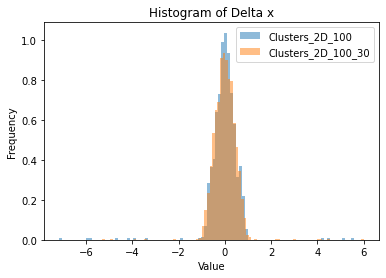

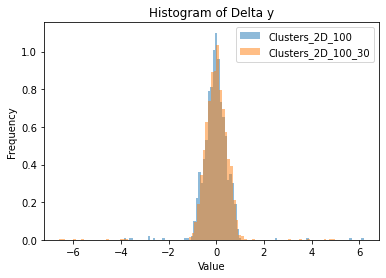

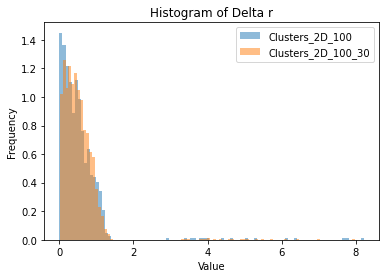

In [9]:
images = read_in_data('./Clusters_2D_100.txt')
found = get_float_result(images, find_points(images, 'local maxima'))
print(found)
result1 = judge(images, found)
images_30 = read_in_data('./Clusters_2D_100_30.txt')
found_30 = get_float_result(images_30, find_points(images_30, 'local maxima'))
result2 = judge(images_30, found_30)

print(np.min(images[0].raw_image))
# result1.print_data()
# result1.plot_histogram()
                                    
# Plot the histograms with specified border colors and transparent fills
plt.hist(result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

Image 7 Raw Data
[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.200e+01 4.000e+01 5.100e+01]
 [0.000e+00 1.800e+01 1.430e+02 4.650e+02 5.960e+02]
 [1.500e+01 1.260e+02 7.040e+02 2.020e+03 2.516e+03]
 [8.600e+01 5.560e+02 2.101e+03 4.191e+03 4.847e+03]]


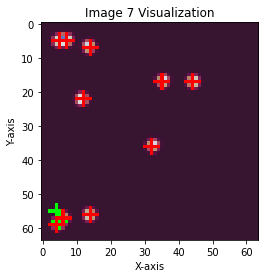

Image 18 Raw Data
[[ 12.   0.   0.   0.  13.]
 [  1.   0.   1.   0.   1.]
 [  0.   0.   0.   0.  13.]
 [  0.   0.   0.   8. 153.]
 [  0.   0.   0.  20. 369.]]


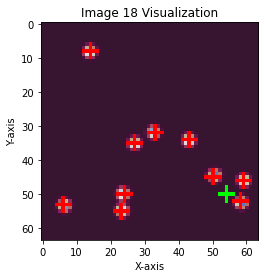

Image 20 Raw Data
[[  0.   0.   0.   0.   0.]
 [ 10.   1.   0.   0.   0.]
 [ 57.   1.   0.   0.   0.]
 [168.   9.   0.   0.   0.]
 [131.   4.   0.   1.   0.]]


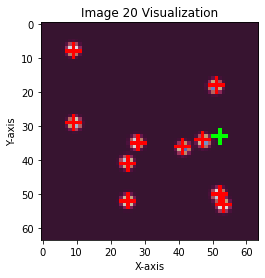

Image 21 Raw Data
[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 4.000e+00 1.900e+01 2.000e+00 2.000e+00]
 [2.100e+01 1.350e+02 2.560e+02 1.750e+02 6.100e+01]
 [1.540e+02 7.590e+02 1.507e+03 1.133e+03 3.550e+02]]


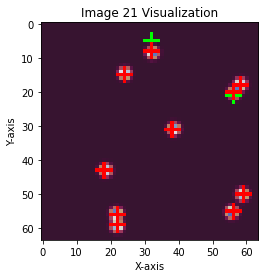

Image 33 Raw Data
[[1.990e+02 1.065e+03 2.281e+03 1.946e+03 7.310e+02]
 [3.200e+01 1.770e+02 4.180e+02 3.230e+02 1.130e+02]
 [3.000e+00 2.600e+01 3.600e+01 1.900e+01 4.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00]]


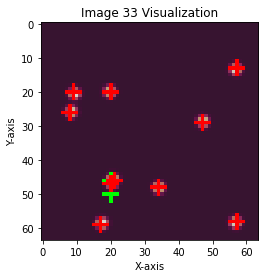

Image 53 Raw Data
[[  0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.]
 [  0.   0.   3.   0.   0.]
 [ 15.  50.  61.  33.   8.]
 [159. 535. 707. 344. 100.]]


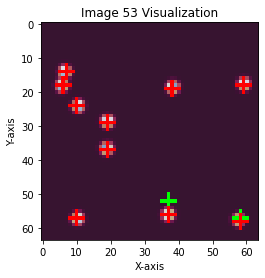

Image 56 Raw Data
[[  5.   0.   0.   0.   0.]
 [ 88.   7.   0.   0.   0.]
 [289.  26.   2.   0.   0.]
 [436.  48.   0.   0.   0.]
 [290.  23.   0.   1.   0.]]


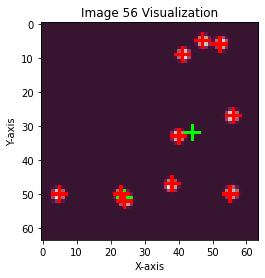

Image 61 Raw Data
[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 2.000e+00 0.000e+00 1.000e+00]
 [3.000e+00 3.200e+01 5.100e+01 5.100e+01 2.100e+01]
 [4.700e+01 2.130e+02 5.960e+02 5.250e+02 2.190e+02]
 [1.490e+02 1.061e+03 2.305e+03 2.365e+03 8.890e+02]]


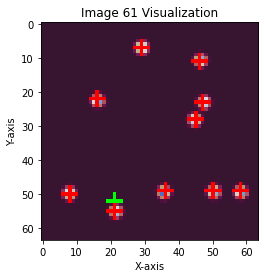

Image 74 Raw Data
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


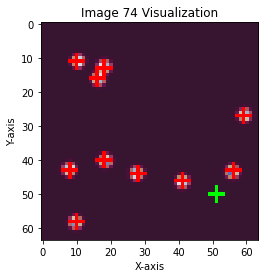

Image 78 Raw Data
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


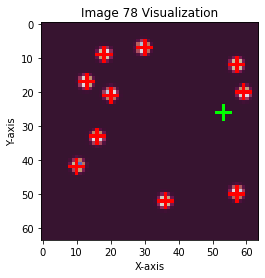

Image 81 Raw Data
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


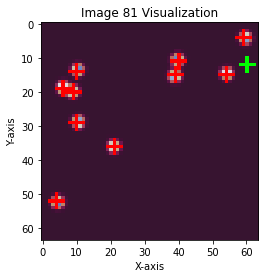

Image 84 Raw Data
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


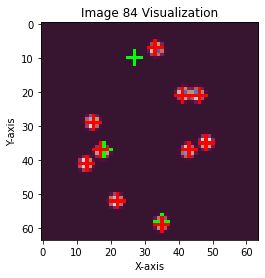

Image 86 Raw Data
[[  0.   1.   0.  10. 233.]
 [  0.   0.   0.  44. 544.]
 [  0.   0.   3.  38. 433.]
 [  0.   0.   0.  16. 142.]
 [  0.   0.   0.   3.  17.]]


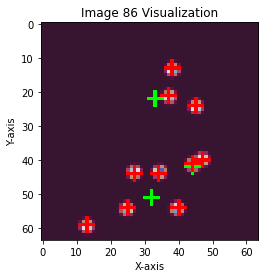

Image 86 Raw Data
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


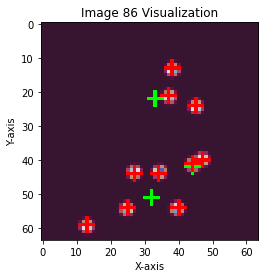

Image 91 Raw Data
[[  6.   0.   0.   0.   0.]
 [ 32.   2.   1.   0.   0.]
 [229.  17.   1.   0.   0.]
 [450.  33.   0.   0.   0.]
 [320.  26.   0.   1.   0.]]


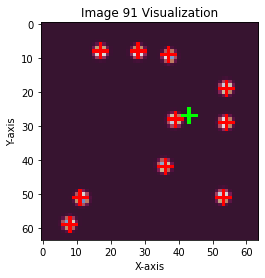

Image 94 Raw Data
[[  0.   1.   0.  11. 136.]
 [  0.   0.   0.  84. 583.]
 [  0.   0.   6. 103. 932.]
 [  0.   0.   5.  64. 603.]
 [  0.   0.   0.  26. 171.]]


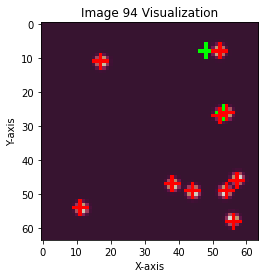

Image 7 Raw Data
Not Found: (7, 5)
[[ 854. 1175. 1254.  704.  192.]
 [3397. 3693. 3790. 2230.  533.]
 [4932. 4867. 4561. 2644.  638.]
 [2857. 2550. 2253. 1212.  288.]
 [ 683.  514.  428.  215.   53.]]


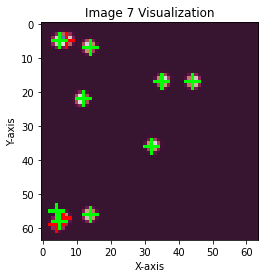

Image 22 Raw Data
Not Found: (25, 22)
[[ 145.  355.  373.  154.   40.]
 [ 746. 1853. 1970.  803.  138.]
 [1456. 3917. 4116. 1903.  352.]
 [1257. 3667. 4630. 2576.  693.]
 [ 647. 2518. 4650. 3839. 1221.]]


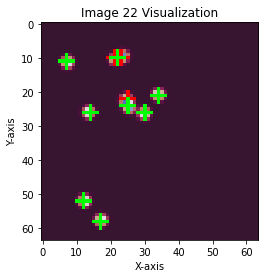

Image 22 Raw Data
Not Found: (23, 10)
[[ 414.  803. 1381. 1253.  480.]
 [1922. 3094. 4052. 3426. 1248.]
 [4128. 5091. 4920. 3548. 1312.]
 [3608. 3591. 2573. 1550.  537.]
 [1250. 1184.  640.  291.  103.]]


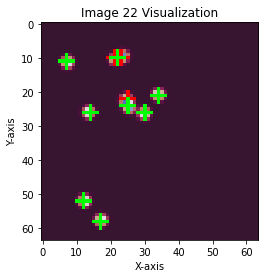

Image 34 Raw Data
Not Found: (30, 27)
[[2214. 4343. 3267.  973.  116.]
 [1717. 4065. 3814. 1460.  240.]
 [1516. 3859. 3878. 1605.  306.]
 [ 692. 1756. 1880.  776.  121.]
 [ 131.  362.  372.  133.   26.]]


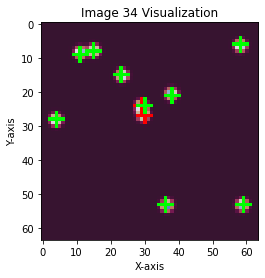

Image 49 Raw Data
Not Found: (48, 17)
[[  31.  192.  444.  380.  122.]
 [ 227.  959. 2078. 1782.  676.]
 [ 964. 2443. 4249. 3563. 1311.]
 [2707. 4111. 4405. 3066. 1039.]
 [3834. 4533. 2725. 1185.  331.]]


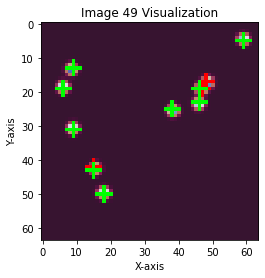

Image 67 Raw Data
Not Found: (14, 34)
[[  74.  496. 1850. 3686. 3273.]
 [ 352. 1519. 3664. 5035. 3877.]
 [ 672. 2728. 4968. 4347. 2319.]
 [ 569. 2140. 3506. 2404.  822.]
 [ 154.  710. 1154.  750.  215.]]


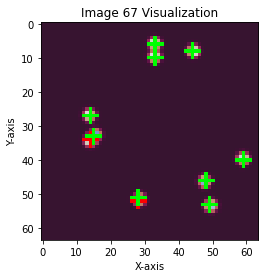

Image 71 Raw Data
Not Found: (7, 27)
[[ 327. 1159. 2301. 3720. 3804.]
 [ 893. 2985. 4717. 5099. 4269.]
 [1028. 3185. 4580. 3380. 2027.]
 [ 416. 1435. 1945. 1100.  430.]
 [  66.  259.  291.  223.   53.]]


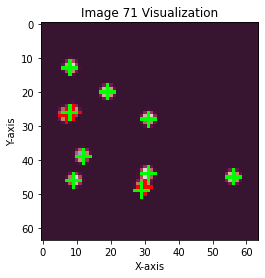

Image 93 Raw Data
Not Found: (44, 16)
[[  22.  124.  298.  382.  486.]
 [ 135.  801. 1775. 2048. 2318.]
 [ 298. 1718. 4046. 4520. 4619.]
 [ 274. 1635. 3709. 3953. 3706.]
 [  92.  576. 1285. 1462. 1207.]]


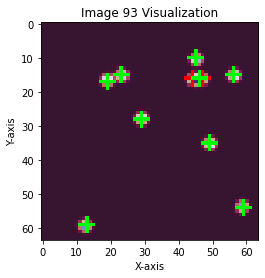

Image 97 Raw Data
Not Found: (31, 18)
[[  55.  239.  440.  306.  111.]
 [ 277. 1176. 2217. 1682.  545.]
 [ 942. 2867. 4619. 3420. 1039.]
 [2219. 4498. 4902. 3019.  828.]
 [2866. 4912. 3744. 1445.  293.]]


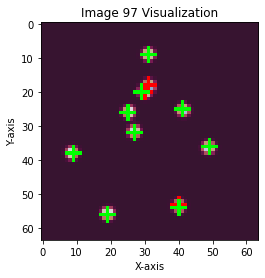

In [10]:
result1.show_error(images, found)

Image 1 Raw Data
[[1.000e+00 0.000e+00 4.000e+00 8.400e+01 3.170e+02]
 [0.000e+00 0.000e+00 3.100e+01 3.550e+02 1.459e+03]
 [0.000e+00 4.000e+00 6.400e+01 6.880e+02 2.761e+03]
 [0.000e+00 0.000e+00 5.200e+01 5.270e+02 1.952e+03]
 [0.000e+00 1.000e+00 3.300e+01 2.630e+02 7.450e+02]]


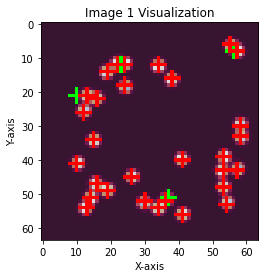

Image 2 Raw Data
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


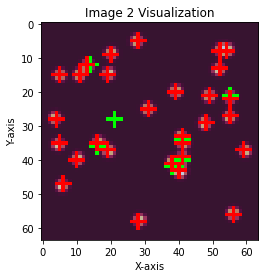

Image 6 Raw Data
[[  0.   1.   0.  11. 170.]
 [  0.   0.   0.  12. 234.]
 [  0.   0.   1.   8. 142.]
 [  0.   0.   1.   3.  41.]
 [  0.   0.   0.   0.   5.]]


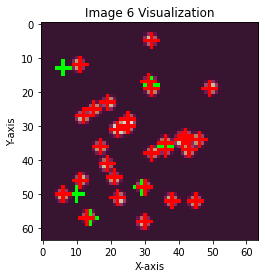

Image 6 Raw Data
[[ 48.  44. 215. 472. 429.]
 [251.  31.  19.  36.  36.]
 [498.  45.   0.   0.   0.]
 [469.  31.   0.   1.   0.]
 [158.  13.   0.   0.   0.]]


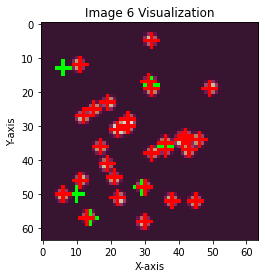

Image 9 Raw Data
[[  0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.]
 [  0.   0.   1.   1.   1.]
 [  3.  13.  36.  37.  13.]
 [ 36. 224. 476. 375. 115.]]


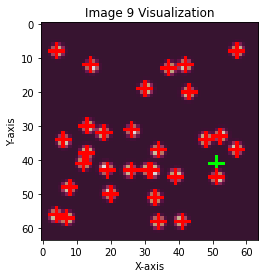

Image 11 Raw Data
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [2. 2. 1. 0. 0.]]


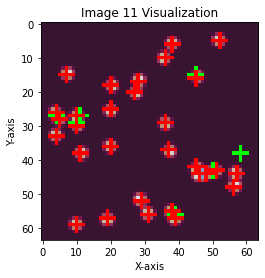

Image 15 Raw Data
[[  5.  35. 144. 248. 124.]
 [  1.   3.   8.   9.  11.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.]]


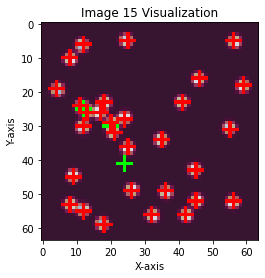

Image 18 Raw Data
[[ 0.  1.  0.  2. 80.]
 [ 0.  0.  0.  7. 66.]
 [ 0.  0.  0.  2. 25.]
 [ 0.  0.  0.  1.  3.]
 [ 0.  0.  0.  0.  0.]]


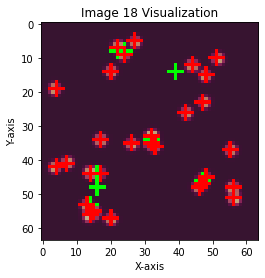

Image 18 Raw Data
[[382. 387. 572. 546. 187.]
 [ 21.  31.  41.  52.  21.]
 [  1.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   1.]
 [ 21.   4.   0.   0.   0.]]


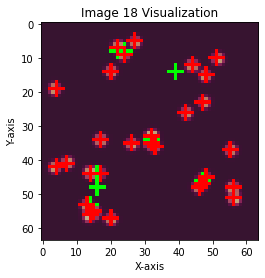

Image 22 Raw Data
[[ 92. 476. 757. 516. 150.]
 [  9.  58.  83.  53.  17.]
 [  0.   2.   3.   0.   0.]
 [  0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.]]


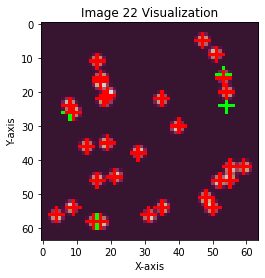

Image 39 Raw Data
[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 8.000e+00 1.600e+01 4.000e+00 0.000e+00]
 [6.800e+01 1.850e+02 1.970e+02 9.400e+01 1.900e+01]
 [4.010e+02 1.230e+03 1.394e+03 6.090e+02 1.080e+02]]


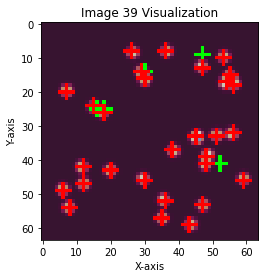

Image 39 Raw Data
[[1.389e+03 2.160e+02 2.100e+01 0.000e+00 0.000e+00]
 [7.800e+02 9.000e+01 1.100e+01 0.000e+00 0.000e+00]
 [4.790e+02 5.900e+01 0.000e+00 0.000e+00 0.000e+00]
 [3.030e+02 2.700e+01 0.000e+00 0.000e+00 0.000e+00]
 [9.500e+01 9.000e+00 0.000e+00 1.000e+00 0.000e+00]]


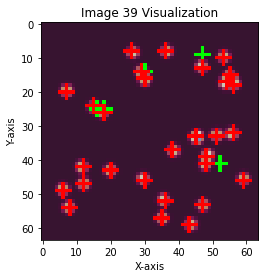

Image 42 Raw Data
[[  0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   1.]
 [  0.   0.   4.  15.  25.]
 [  0.   3.  50. 224. 403.]]


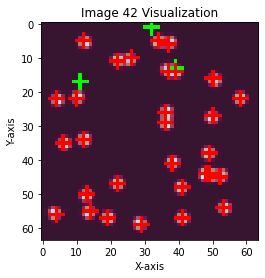

Image 42 Raw Data
[[  0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  4.   9.   6.   3.   0.]
 [103. 202. 180.  50.   6.]]


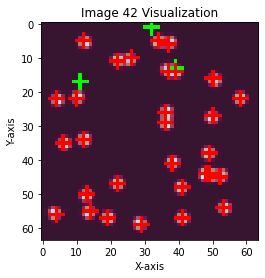

Image 55 Raw Data
[[148. 107.  25.   0.   0.]
 [ 16.   7.   1.   0.   3.]
 [  0.   0.   0.   0.   1.]
 [  0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.]]


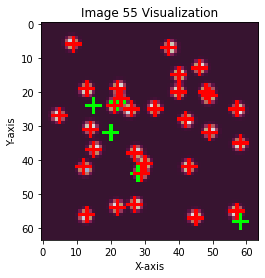

Image 55 Raw Data
[[1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [7. 1. 0. 0. 0.]]


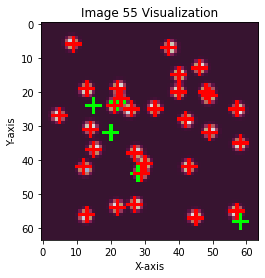

Image 55 Raw Data
[[2.514e+03 3.195e+03 1.581e+03 2.630e+02 2.300e+01]
 [7.360e+02 9.680e+02 4.970e+02 8.800e+01 1.100e+01]
 [8.200e+01 1.310e+02 5.700e+01 1.300e+01 0.000e+00]
 [6.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00]]


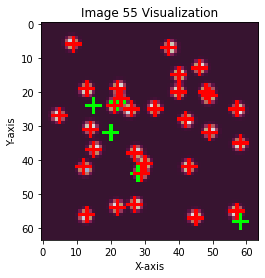

Image 59 Raw Data
[[ 72.  65. 195. 253. 117.]
 [185.  16.   7.  17.   7.]
 [177.  11.   0.   0.   0.]
 [ 83.   3.   0.   0.   1.]
 [ 11.   1.   0.   0.   0.]]


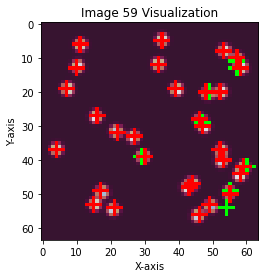

Image 67 Raw Data
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


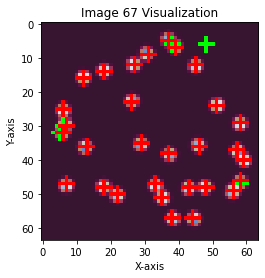

Image 81 Raw Data
[[2.631e+03 7.820e+02 1.020e+02 8.000e+00 3.000e+00]
 [2.798e+03 7.730e+02 8.400e+01 4.000e+00 0.000e+00]
 [1.166e+03 3.280e+02 3.500e+01 3.000e+00 0.000e+00]
 [1.730e+02 4.700e+01 4.000e+00 0.000e+00 0.000e+00]
 [1.800e+01 3.000e+00 0.000e+00 0.000e+00 1.000e+00]]


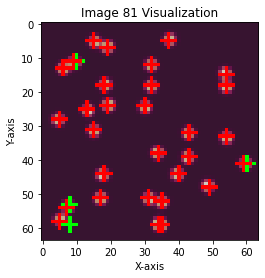

Image 94 Raw Data
[[  0.  29.  78. 173. 102.]
 [  0.   1.   6.  12.  12.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.]]


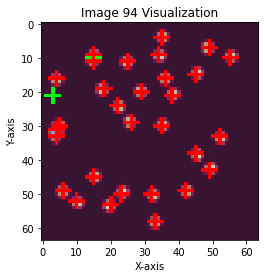

Image 95 Raw Data
[[  0.   1.   0.   7.  61.]
 [  0.   0.   0.  26. 315.]
 [  0.   0.   0.  30. 480.]
 [  0.   0.   0.  19. 293.]
 [  0.   0.   0.   7.  81.]]


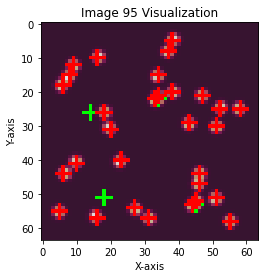

Image 95 Raw Data
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [12.  2.  0.  0.  0.]]


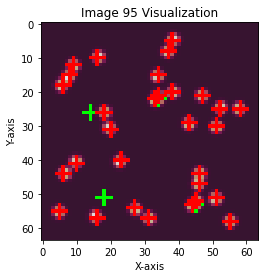

Image 96 Raw Data
[[  0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.]
 [ 18.  50.  51.  18.   1.]
 [196. 455. 410. 166.  21.]]


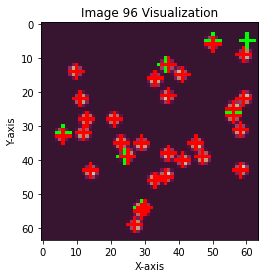

Image 98 Raw Data
[[ 12.   0.   0.   0.   0.]
 [ 90.   3.   0.   0.   0.]
 [240.  18.   0.   0.   0.]
 [285.  12.   0.   0.   0.]
 [133.   6.   0.   1.   0.]]


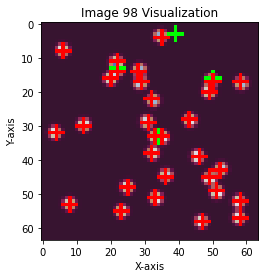

Image 0 Raw Data
Not Found: (35, 6)
[[ 308. 1024. 1453.  872.  191.]
 [1171. 3037. 3963. 2216.  516.]
 [2545. 4879. 5334. 2612.  590.]
 [3430. 5374. 4297. 1547.  281.]
 [2398. 3566. 2359.  664.   87.]]


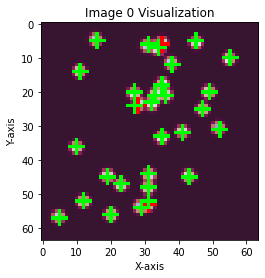

Image 1 Raw Data
Not Found: (55, 6)
[[  22.  122.  297.  214.   83.]
 [ 135.  752. 1648. 1515.  579.]
 [ 306. 1739. 3839. 3771. 1918.]
 [ 306. 1644. 3748. 4408. 3823.]
 [ 114.  629. 1753. 3214. 4741.]]


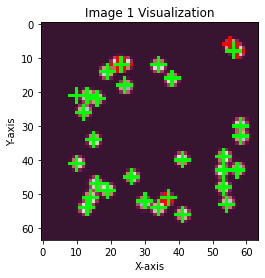

Image 3 Raw Data
Not Found: (49, 48)
[[2725. 1199. 1460. 1207.  439.]
 [1634. 2046. 3893. 3438. 1139.]
 [ 669. 2412. 5274. 4695. 1626.]
 [ 401. 2283. 5351. 4821. 1721.]
 [ 348. 1940. 4209. 3812. 1403.]]


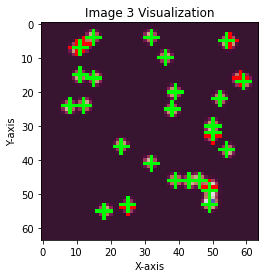

Image 6 Raw Data
Not Found: (25, 30)
[[ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]
 [6788. 4932. 4043. 1759.  379.]
 [3403. 1945. 1356.  581.   85.]]


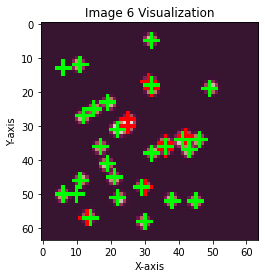

Image 6 Raw Data
Not Found: (25, 28)
[[  33.  129.  296.  270.   91.]
 [ 149.  787. 1692. 1483.  557.]
 [ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]]


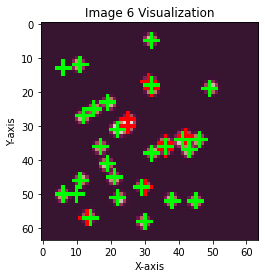

Image 7 Raw Data
Not Found: (20, 54)
[[6188. 5693. 3841. 1848.  574.]
 [4391. 4767. 5129. 3730. 1365.]
 [1366. 2299. 4012. 3695. 1423.]
 [ 226.  766. 1560. 1577.  577.]
 [  21.  113.  274.  245.  100.]]


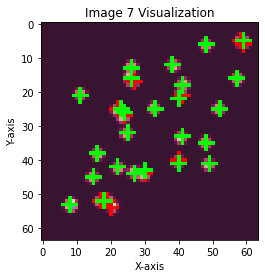

Image 8 Raw Data
Not Found: (48, 28)
[[1087. 1108.  922.  427.   87.]
 [4571. 4228. 3486. 1549.  317.]
 [8552. 7325. 5042. 2181.  391.]
 [7362. 5437. 3128. 1280.  252.]
 [3293. 2674. 1535.  527.   86.]]


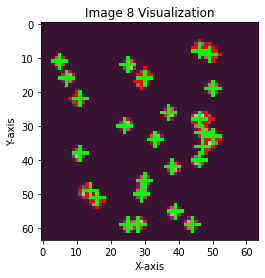

Image 8 Raw Data
Not Found: (29, 17)
[[ 202. 1030. 3214. 4598. 2795.]
 [ 369. 1899. 4749. 5235. 2636.]
 [ 622. 2616. 5188. 4317. 1576.]
 [ 389. 1703. 3128. 2272.  669.]
 [ 107.  454.  864.  611.  179.]]


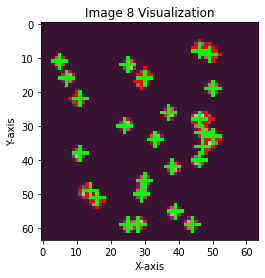

Image 10 Raw Data
Not Found: (35, 42)
[[ 440. 1163. 1460.  697.  119.]
 [1062. 3282. 3694. 1778.  312.]
 [1526. 4238. 4510. 2029.  369.]
 [2178. 4587. 4006. 1484.  231.]
 [2306. 4425. 3466. 1108.  130.]]


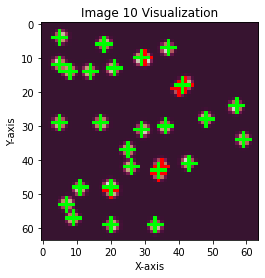

Image 11 Raw Data
Not Found: (45, 42)
[[  16.  114.  253.  247.   93.]
 [ 133.  699. 1570. 1472.  580.]
 [ 327. 1742. 4041. 3934. 1937.]
 [ 334. 2073. 5088. 5777. 4079.]
 [ 207. 1624. 4549. 6445. 6016.]]


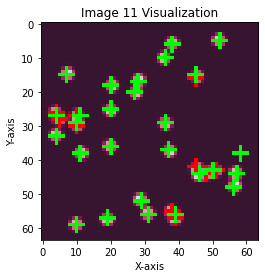

Image 11 Raw Data
Not Found: (38, 55)
[[ 188.  493.  548.  247.   59.]
 [ 732. 2119. 2481. 1071.  252.]
 [1310. 3800. 4433. 2360.  567.]
 [ 898. 3048. 4460. 3655. 1432.]
 [ 348. 1545. 3883. 4572. 2398.]]


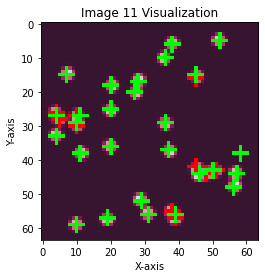

Image 11 Raw Data
Not Found: (48, 44)
[[3934. 1937.  869. 1026. 2037.]
 [5777. 4079. 3193. 2637. 4047.]
 [6445. 6016. 4932. 3323. 3253.]
 [4298. 4120. 3274. 1830. 1120.]
 [1353. 1164.  868.  435.  146.]]


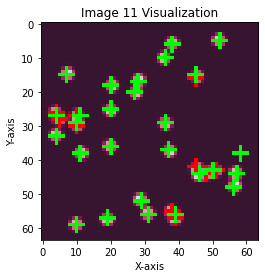

Image 12 Raw Data
Not Found: (21, 13)
[[  93.  314.  461.  235.   29.]
 [ 538. 1573. 2198. 1131.  248.]
 [1231. 3632. 4416. 2306.  454.]
 [2138. 4558. 4599. 2078.  423.]
 [2895. 4988. 3746. 1252.  198.]]


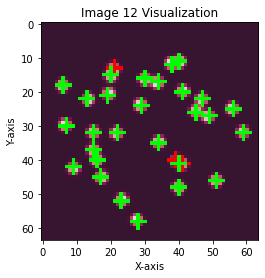

Image 17 Raw Data
Not Found: (22, 35)
[[  90.  216.  303.  203.   59.]
 [ 618. 1431. 1842. 1142.  328.]
 [2463. 4362. 5066. 3054.  802.]
 [4040. 6339. 5680. 3048.  776.]
 [2848. 3804. 2869. 1252.  284.]]


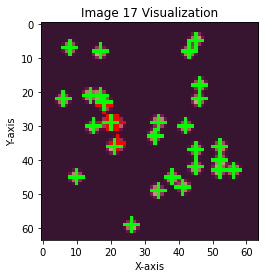

Image 17 Raw Data
Not Found: (22, 29)
[[1227. 1034.  578.  203.   45.]
 [5153. 4832. 2937. 1029.  161.]
 [8704. 8514. 5680. 2190.  402.]
 [5973. 6389. 4639. 1854.  373.]
 [1641. 1875. 1477.  638.  105.]]


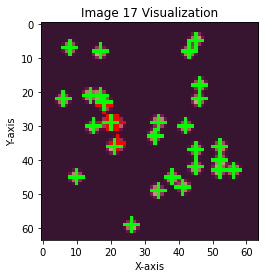

Image 18 Raw Data
Not Found: (33, 36)
[[6863. 9362. 5435. 1437.  179.]
 [5580. 8049. 5537. 1999.  340.]
 [3465. 6187. 5611. 2444.  473.]
 [1226. 2647. 3077. 1454.  299.]
 [ 208.  574.  730.  373.   89.]]


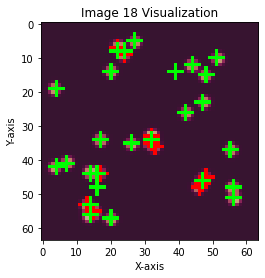

Image 18 Raw Data
Not Found: (46, 48)
[[ 283. 1576. 4319. 6576. 5090.]
 [ 844. 3262. 6323. 6522. 3446.]
 [1171. 3871. 5678. 4428. 1670.]
 [ 660. 2087. 2766. 1674.  486.]
 [ 136.  444.  590.  340.   59.]]


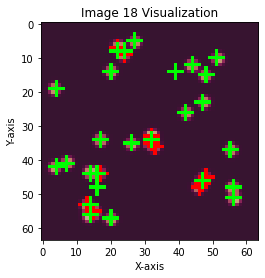

Image 18 Raw Data
Not Found: (15, 55)
[[4181. 2865. 1038.  352.  103.]
 [3970. 3409. 2523. 1630.  520.]
 [2928. 4118. 4807. 3508. 1167.]
 [3757. 5518. 5099. 3292. 1094.]
 [3327. 4244. 2822. 1314.  471.]]


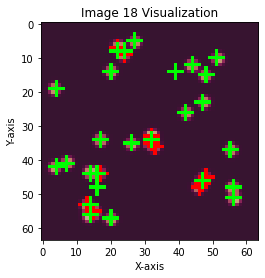

Image 19 Raw Data
Not Found: (24, 45)
[[  72.  678. 2477. 4233. 3031.]
 [ 273. 1557. 4335. 5702. 3359.]
 [ 401. 2244. 4967. 4816. 2203.]
 [ 319. 1609. 3320. 2980. 1245.]
 [ 103.  476. 1152. 1678. 1795.]]


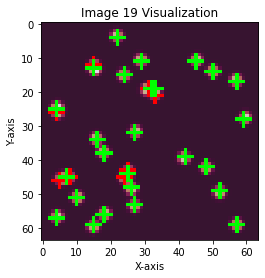

Image 19 Raw Data
Not Found: (5, 46)
[[ 124.  614. 1443. 2100. 2835.]
 [ 289. 1517. 3680. 4646. 5039.]
 [ 309. 1697. 3865. 4359. 3719.]
 [ 131.  736. 1624. 1774. 1145.]
 [  21.  115.  262.  264.  143.]]


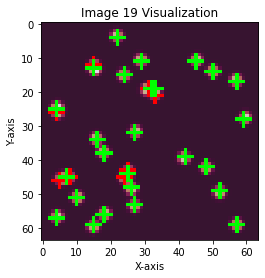

Image 22 Raw Data
Not Found: (18, 22)
[[ 166.  572. 1961. 3868. 3486.]
 [ 223. 1142. 3121. 4810. 3649.]
 [ 472. 2230. 4497. 4323. 2233.]
 [ 452. 2141. 4013. 3078. 1032.]
 [ 174.  821. 1454. 1106.  361.]]


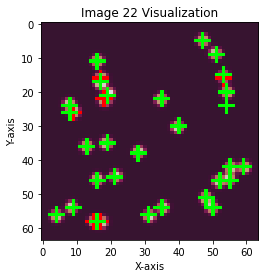

Image 25 Raw Data
Not Found: (13, 52)
[[ 784. 3029. 4438. 2549.  588.]
 [1051. 3745. 5146. 2936.  614.]
 [1258. 4194. 4968. 2592.  498.]
 [1215. 3333. 3860. 1746.  331.]
 [1107. 1393. 1507.  683.  102.]]


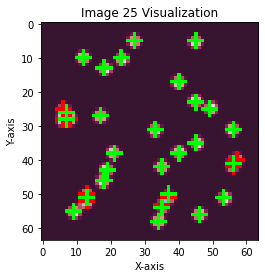

Image 29 Raw Data
Not Found: (37, 50)
[[ 240.  608.  780.  316.   47.]
 [1458. 2721. 2717. 1086.  181.]
 [3801. 5010. 4475. 1770.  278.]
 [5278. 4735. 2995. 1116.  195.]
 [3293. 2351.  946.  305.   39.]]


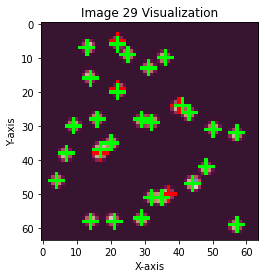

Image 30 Raw Data
Not Found: (5, 12)
[[ 264. 1568. 3987. 4709. 2352.]
 [ 714. 2590. 4598. 3972. 1631.]
 [ 971. 3226. 4593. 2868. 1106.]
 [ 528. 1962. 2703. 1531.  720.]
 [ 137.  465.  646.  312.  203.]]


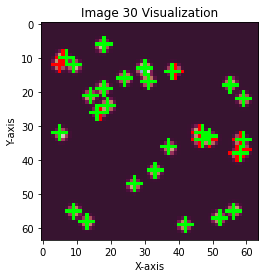

Image 31 Raw Data
Not Found: (54, 25)
[[1007.  578.  790.  592.  175.]
 [ 808. 1802. 2954. 2161.  634.]
 [2624. 3689. 4697. 3136.  948.]
 [6593. 5740. 3840. 2006.  563.]
 [8257. 5985. 2167.  606.  147.]]


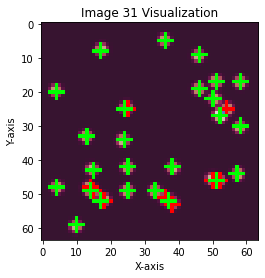

Image 34 Raw Data
Not Found: (12, 7)
[[1415. 4143. 4764. 2262.  398.]
 [1618. 4399. 4813. 2066.  372.]
 [1689. 4303. 4469. 1884.  260.]
 [1072. 2754. 2779. 1106.  186.]
 [ 287.  765.  727.  297.   53.]]


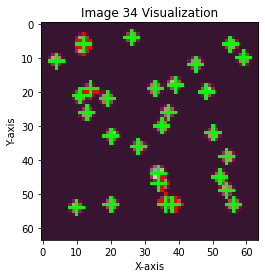

Image 35 Raw Data
Not Found: (55, 7)
[[  88.  276.  358.  190.   44.]
 [ 446. 1477. 1965. 1007.  192.]
 [1079. 3280. 4278. 2262.  462.]
 [1540. 3909. 4599. 2569.  754.]
 [2298. 4667. 5082. 3545. 1769.]]


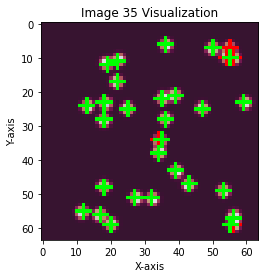

Image 38 Raw Data
Not Found: (53, 30)
[[  70.  296.  793. 1181.  811.]
 [ 360. 1582. 3307. 4087. 2717.]
 [ 903. 3300. 6065. 6348. 3653.]
 [ 801. 3129. 4950. 4271. 2080.]
 [ 346. 1120. 1660. 1236.  519.]]


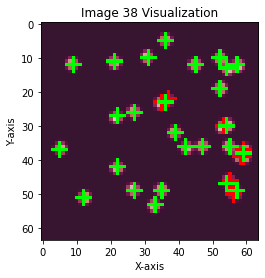

Image 38 Raw Data
Not Found: (58, 39)
[[1411. 1417. 3421. 5560. 4460.]
 [1024. 3049. 6488. 7847. 5005.]
 [ 841. 3474. 7081. 7480. 4257.]
 [ 382. 1740. 3503. 4094. 2218.]
 [  68.  330.  726.  901.  541.]]


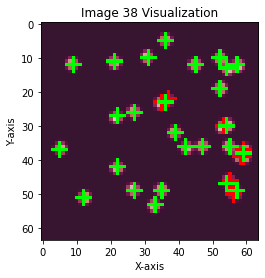

Image 39 Raw Data
Not Found: (55, 15)
[[  94.  301.  346.  174.   40.]
 [ 469. 1591. 1906.  992.  206.]
 [1355. 3578. 4206. 2299.  592.]
 [2477. 4574. 4906. 3309. 1480.]
 [4048. 5014. 4633. 4695. 3002.]]


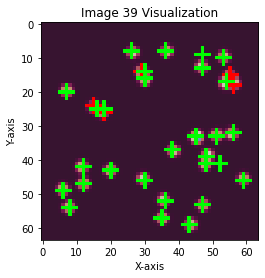

Image 39 Raw Data
Not Found: (56, 18)
[[4574. 4906. 3309. 1480.  327.]
 [5014. 4633. 4695. 3002.  799.]
 [3869. 3643. 4127. 2908.  869.]
 [1393. 1336. 1676. 1126.  333.]
 [ 198.  209.  241.  190.   54.]]


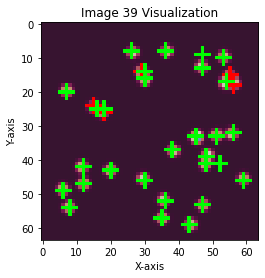

Image 41 Raw Data
Not Found: (51, 44)
[[ 170.  544.  764.  410.   86.]
 [ 685. 2157. 2917. 1611.  328.]
 [1551. 3842. 4633. 2443.  508.]
 [3102. 4746. 3850. 1637.  353.]
 [3816. 4542. 2435.  656.   97.]]


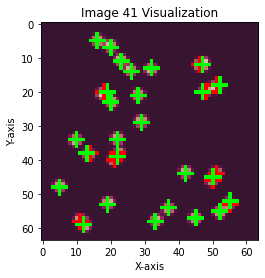

Image 41 Raw Data
Not Found: (21, 40)
[[ 172.  812. 2394. 4382. 3986.]
 [ 586. 2242. 4280. 4767. 3321.]
 [ 768. 3023. 4683. 3508. 1409.]
 [ 439. 1646. 2592. 1546.  452.]
 [  79.  388.  586.  342.   72.]]


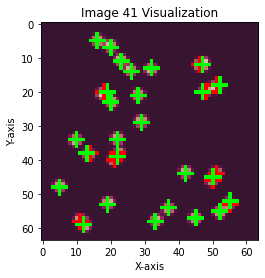

Image 43 Raw Data
Not Found: (39, 28)
[[ 219.  379.  791. 1114. 1873.]
 [ 464. 1674. 3047. 4111. 5883.]
 [ 669. 2743. 4889. 5921. 7497.]
 [ 425. 1875. 3340. 3558. 3779.]
 [ 138.  500.  876.  890.  822.]]


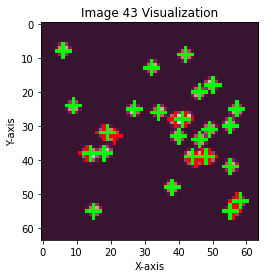

Image 47 Raw Data
Not Found: (35, 27)
[[2951. 4510. 3287. 1168.  193.]
 [1773. 3800. 4364. 2183.  437.]
 [ 973. 3185. 4305. 2409.  558.]
 [ 383. 1462. 2076. 1137.  260.]
 [  85.  275.  383.  221.   63.]]


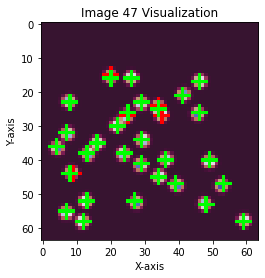

Image 50 Raw Data
Not Found: (32, 56)
[[ 393.  317.  323.  206.   94.]
 [2217. 1961. 1846. 1199.  415.]
 [4590. 4449. 4350. 2875.  787.]
 [4041. 3931. 4286. 2811.  790.]
 [1361. 1521. 1541. 1020.  322.]]


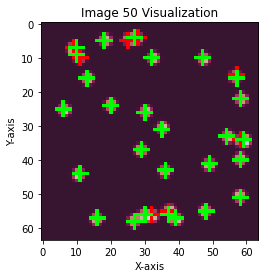

Image 50 Raw Data
Not Found: (25, 5)
[[ 137.  754. 1541. 1704. 1809.]
 [ 339. 1844. 3983. 4092. 4313.]
 [ 389. 1905. 3920. 3985. 3911.]
 [ 147.  762. 1558. 1606. 1431.]
 [  20.  115.  233.  240.  202.]]


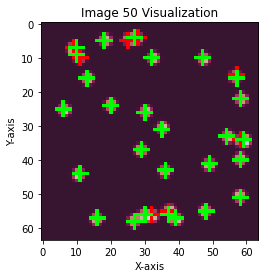

Image 51 Raw Data
Not Found: (57, 12)
[[  22.  168.  338.  275.   99.]
 [ 177.  921. 1753. 1522.  665.]
 [ 449. 2074. 4294. 3997. 2645.]
 [ 407. 2009. 4114. 4930. 4931.]
 [ 147.  721. 1822. 3022. 3947.]]


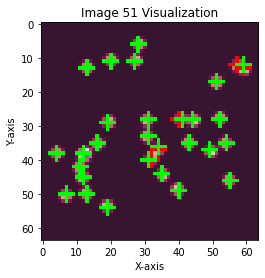

Image 52 Raw Data
Not Found: (39, 19)
[[ 321.  871. 1114.  557.  110.]
 [1175. 3170. 3652. 1710.  331.]
 [2753. 5254. 5347. 2267.  432.]
 [3892. 5827. 4209. 1450.  219.]
 [2903. 3655. 2188.  538.   57.]]


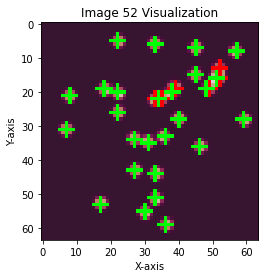

Image 52 Raw Data
Not Found: (52, 13)
[[ 101.  324.  434.  221.   41.]
 [ 517. 1677. 2029. 1049.  216.]
 [1136. 3440. 4376. 2105.  386.]
 [1554. 4124. 4682. 2328.  426.]
 [2784. 5882. 5633. 2370.  423.]]


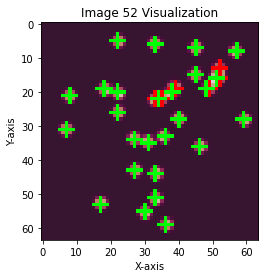

Image 53 Raw Data
Not Found: (30, 33)
[[  91.  588. 1283. 1830. 2775.]
 [ 298. 1557. 3609. 4227. 4376.]
 [ 341. 1757. 3979. 4010. 3046.]
 [ 181.  814. 1714. 1650.  957.]
 [ 147.  170.  336.  280.  169.]]


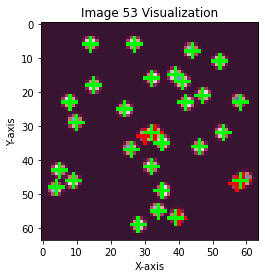

Image 59 Raw Data
Not Found: (44, 47)
[[ 229.  641.  928.  542.  148.]
 [1129. 2645. 3309. 1834.  413.]
 [3219. 5358. 5310. 2714.  588.]
 [4467. 5527. 4049. 1647.  359.]
 [2566. 2882. 1640.  498.   87.]]


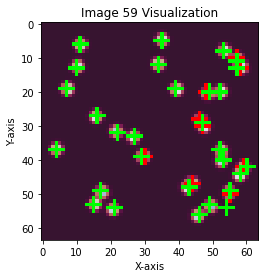

Image 60 Raw Data
Not Found: (6, 4)
[[ 230.  287.  305.  472.  943.]
 [1660. 1916. 1846. 1898. 3076.]
 [4541. 4924. 4205. 3295. 4318.]
 [5094. 5082. 4022. 2380. 2346.]
 [2377. 2034. 1575.  788.  509.]]


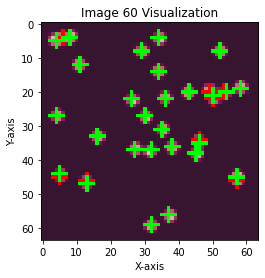

Image 60 Raw Data
Not Found: (49, 20)
[[ 213.  919. 1468.  993.  310.]
 [ 558. 2364. 3955. 2745.  900.]
 [ 634. 2500. 4326. 3591. 1880.]
 [ 264. 1269. 3189. 4433. 3318.]
 [  80.  577. 2243. 4295. 3644.]]


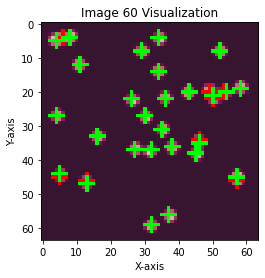

Image 62 Raw Data
Not Found: (49, 54)
[[  54.  236.  401.  261.   99.]
 [ 296. 1241. 2053. 1368.  591.]
 [ 882. 3085. 4801. 3071. 1361.]
 [2049. 5053. 6303. 3910. 1491.]
 [3743. 7437. 7437. 3835. 1073.]]


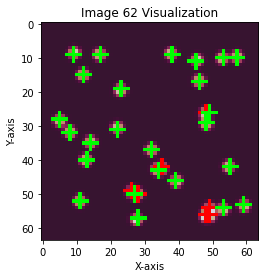

Image 62 Raw Data
Not Found: (35, 42)
[[ 193.  329.  332.  171.   41.]
 [1145. 2096. 2302. 1154.  250.]
 [3447. 5830. 5569. 2823.  592.]
 [4147. 6415. 5590. 2628.  569.]
 [2007. 2995. 2330. 1060.  258.]]


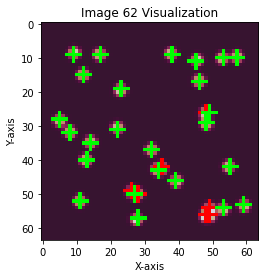

Image 62 Raw Data
Not Found: (48, 56)
[[ 129.  882. 3085. 4801. 3071.]
 [ 411. 2049. 5053. 6303. 3910.]
 [ 866. 3743. 7437. 7437. 3835.]
 [ 815. 3349. 6201. 5876. 2796.]
 [ 296. 1129. 2197. 2022.  959.]]


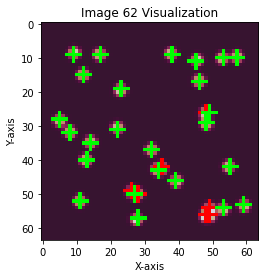

Image 62 Raw Data
Not Found: (49, 56)
[[ 882. 3085. 4801. 3071. 1361.]
 [2049. 5053. 6303. 3910. 1491.]
 [3743. 7437. 7437. 3835. 1073.]
 [3349. 6201. 5876. 2796.  642.]
 [1129. 2197. 2022.  959.  219.]]


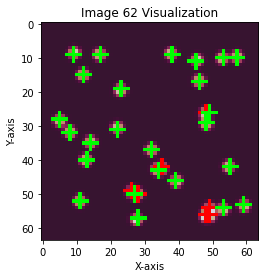

Image 63 Raw Data
Not Found: (9, 55)
[[ 125.  377.  413.  227.   91.]
 [ 911. 2319. 2571. 1221.  235.]
 [2580. 6004. 6210. 2824.  551.]
 [3198. 6966. 6402. 2666.  544.]
 [1761. 3340. 2897. 1102.  197.]]


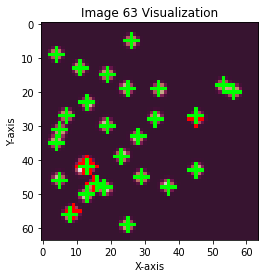

Image 65 Raw Data
Not Found: (51, 48)
[[  35.  187.  503. 1178. 2465.]
 [ 228. 1138. 2362. 3574. 5225.]
 [ 496. 2371. 5101. 6585. 6777.]
 [ 470. 2095. 4685. 6068. 5561.]
 [ 170.  792. 1747. 2662. 2669.]]


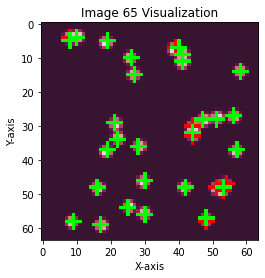

Image 65 Raw Data
Not Found: (44, 30)
[[  43.  209.  439.  601. 1759.]
 [ 207. 1120. 2085. 1821. 1676.]
 [ 506. 2364. 4383. 3325. 1355.]
 [ 505. 2427. 4656. 3564. 1155.]
 [ 458. 2385. 4671. 3776. 1234.]]


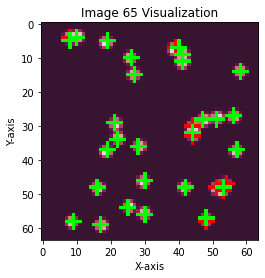

Image 73 Raw Data
Not Found: (58, 11)
[[ 512. 1350. 1673.  739.  159.]
 [1499. 3427. 3773. 1771.  332.]
 [3350. 4736. 4285. 1888.  337.]
 [5204. 4330. 2364.  847.  132.]
 [4258. 2685.  922.  195.   22.]]


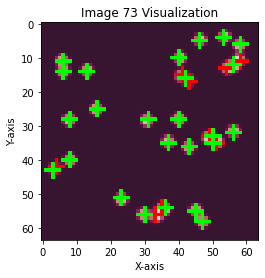

Image 73 Raw Data
Not Found: (54, 13)
[[  74.  335.  895. 1816. 3350.]
 [ 316. 1463. 3056. 4230. 5204.]
 [ 560. 2486. 4762. 5037. 4258.]
 [ 335. 1578. 3063. 2720. 1641.]
 [  93.  421.  784.  629.  328.]]


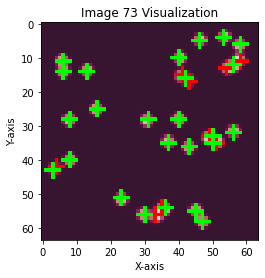

Image 73 Raw Data
Not Found: (33, 56)
[[ 385.  221.  779. 3468. 7370.]
 [1380. 1036. 1992. 3982. 6616.]
 [2267. 1966. 3820. 4377. 3180.]
 [1428. 1774. 3564. 3333. 1416.]
 [ 375.  638. 1363. 1245.  481.]]


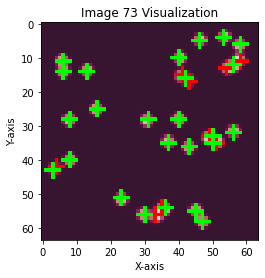

Image 74 Raw Data
Not Found: (31, 14)
[[  87.  225.  430.  337.  154.]
 [ 680. 1262. 2108. 1788.  802.]
 [2802. 3558. 4446. 3726. 2343.]
 [4589. 4481. 4114. 3523. 3640.]
 [3172. 2664. 1670. 1566. 2738.]]


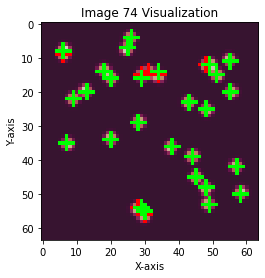

Image 76 Raw Data
Not Found: (27, 51)
[[ 456. 1329. 3780. 4411. 2179.]
 [ 987. 2147. 5016. 5158. 2186.]
 [1090. 2548. 5095. 4336. 1537.]
 [ 597. 1711. 3290. 2640.  795.]
 [ 131.  507.  957.  730.  203.]]


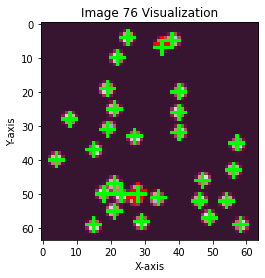

Image 77 Raw Data
Not Found: (53, 48)
[[ 155.  971. 3333. 4719. 2613.]
 [ 506. 2168. 5361. 6235. 3089.]
 [1608. 3828. 5926. 5050. 2148.]
 [3215. 5128. 4764. 2917.  929.]
 [2995. 4080. 2538.  853.  229.]]


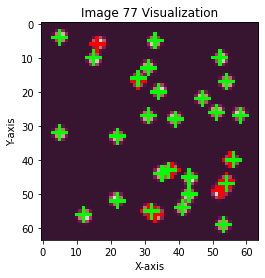

Image 77 Raw Data
Not Found: (16, 6)
[[  74.  456. 1157. 1192.  479.]
 [ 233. 1322. 3314. 3212. 1314.]
 [ 224. 1421. 3697. 3697. 1406.]
 [ 113.  683. 1706. 1609.  646.]
 [ 186.  406.  505.  388.  133.]]


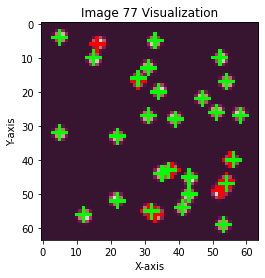

Image 77 Raw Data
Not Found: (52, 49)
[[  85.  506. 2168. 5361. 6235.]
 [ 420. 1608. 3828. 5926. 5050.]
 [1009. 3215. 5128. 4764. 2917.]
 [ 890. 2995. 4080. 2538.  853.]
 [ 342. 1141. 1433.  745.  183.]]


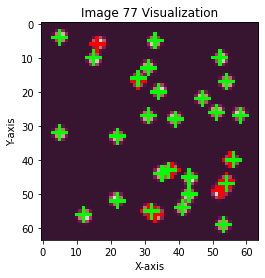

Image 78 Raw Data
Not Found: (18, 48)
[[ 148.  429.  651.  482.  125.]
 [ 996. 2049. 2734. 1970.  555.]
 [3409. 4491. 5026. 3171.  923.]
 [6362. 5693. 3983. 2250.  592.]
 [6734. 4344. 1705.  609.  162.]]


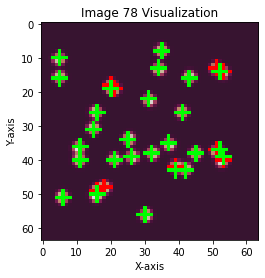

Image 78 Raw Data
Not Found: (53, 14)
[[2342. 1566.  561.  204.   45.]
 [4674. 3659. 2282. 1057.  237.]
 [3808. 4526. 4499. 2417.  560.]
 [1586. 3111. 3970. 2320.  551.]
 [ 362.  990. 1485.  933.  225.]]


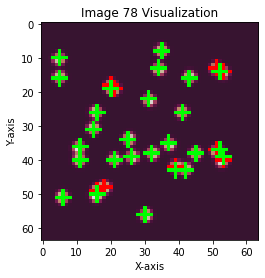

Image 79 Raw Data
Not Found: (53, 25)
[[ 262. 1251. 3292. 4967. 4035.]
 [ 643. 2721. 4880. 4958. 2956.]
 [ 675. 2643. 4208. 2950. 1204.]
 [ 297. 1049. 1712. 1041.  286.]
 [ 221.  180.  254.  140.   32.]]


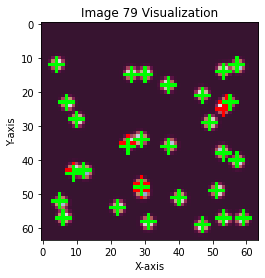

Image 80 Raw Data
Not Found: (55, 41)
[[ 207.  648.  763.  418.   71.]
 [ 812. 2367. 2870. 1445.  279.]
 [1170. 3772. 4701. 2471.  528.]
 [ 919. 3232. 4868. 3058.  852.]
 [ 577. 2597. 4911. 3500. 1142.]]


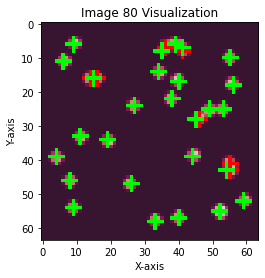

Image 82 Raw Data
Not Found: (5, 44)
[[  96.  576. 1049.  787.  257.]
 [ 368. 1835. 3597. 2917.  987.]
 [ 563. 2785. 5867. 4793. 1508.]
 [ 494. 2724. 5869. 4950. 1766.]
 [ 312. 1726. 3916. 3517. 1249.]]


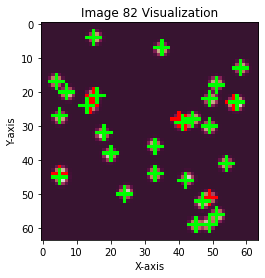

Image 82 Raw Data
Not Found: (49, 51)
[[ 143.  428.  563.  266.   58.]
 [ 796. 2046. 2495. 1324.  294.]
 [2522. 4094. 4323. 2314.  434.]
 [4638. 4403. 3519. 1557.  311.]
 [4128. 2646. 1235.  452.  134.]]


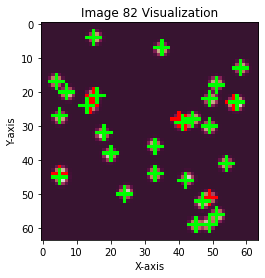

Image 83 Raw Data
Not Found: (43, 47)
[[  34.  185.  448.  491.  238.]
 [ 224. 1214. 2578. 2908. 1595.]
 [ 576. 2850. 6236. 6740. 3695.]
 [ 767. 2772. 5829. 6236. 3454.]
 [1132. 1224. 2250. 2276. 1208.]]


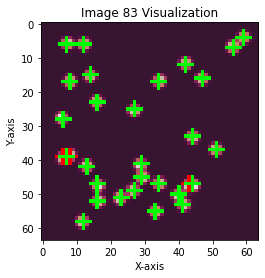

Image 86 Raw Data
Not Found: (10, 33)
[[  34.  173.  375.  437.  435.]
 [ 175.  848. 2003. 2232. 2250.]
 [ 328. 1831. 4123. 4416. 4598.]
 [ 276. 1497. 3391. 3702. 3621.]
 [  68.  496. 1104. 1155. 1154.]]


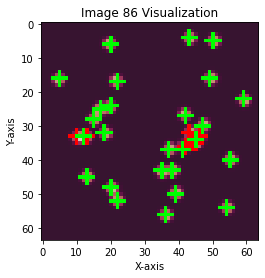

Image 86 Raw Data
Not Found: (43, 32)
[[  64.  303.  704.  769.  644.]
 [ 157. 1082. 2731. 2667. 1377.]
 [ 250. 1607. 4039. 4439. 3024.]
 [ 210. 1185. 3304. 4674. 5710.]
 [ 606. 1386. 3363. 6567. 8464.]]


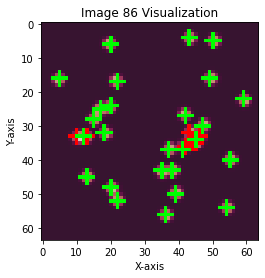

Image 89 Raw Data
Not Found: (59, 50)
[[ 620. 2767. 4750. 3334.  941.]
 [ 548. 2555. 4594. 3236.  951.]
 [ 549. 2569. 4583. 3514. 1013.]
 [ 315. 1531. 2845. 2121.  677.]
 [  73.  366.  744.  562.  162.]]


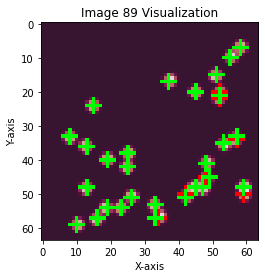

Image 90 Raw Data
Not Found: (21, 6)
[[ 227.  573.  652.  260.   40.]
 [ 891. 2364. 2546. 1080.  195.]
 [1506. 3969. 4393. 1955.  343.]
 [1305. 3736. 4628. 2256.  454.]
 [ 955. 3503. 4859. 2709.  648.]]


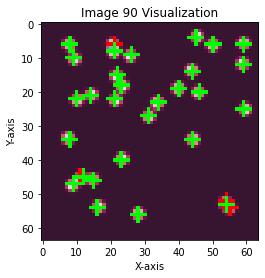

Image 91 Raw Data
Not Found: (33, 38)
[[1531. 5581. 8140. 4964. 1183.]
 [ 985. 3952. 6135. 4100. 1073.]
 [ 509. 2426. 5023. 4093. 1349.]
 [ 310. 1660. 3620. 3351. 1179.]
 [  95.  558. 1238. 1177.  409.]]


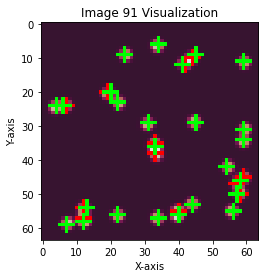

Image 92 Raw Data
Not Found: (52, 8)
[[  97.  398. 1311. 3284. 4232.]
 [ 594. 1869. 3095. 3737. 3708.]
 [2016. 4875. 5777. 3696. 1690.]
 [3262. 6456. 6187. 2949.  672.]
 [2399. 4187. 3288. 1215.  216.]]


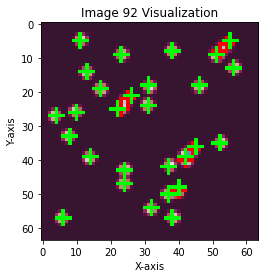

Image 94 Raw Data
Not Found: (4, 33)
[[ 970. 4098. 7617. 6012. 2138.]
 [1269. 4832. 7087. 4529. 1131.]
 [1196. 3894. 5108. 2558.  590.]
 [ 505. 1656. 2057. 1036.  218.]
 [  83.  327.  363.  170.   42.]]


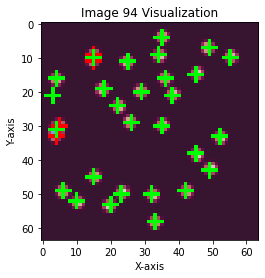

Image 99 Raw Data
Not Found: (19, 38)
[[ 110.  434.  594.  560. 1361.]
 [ 709. 2039. 2924. 1961. 1935.]
 [1937. 4984. 6003. 3318. 1443.]
 [2775. 6170. 6104. 2784.  716.]
 [1893. 3730. 3303. 1216.  222.]]


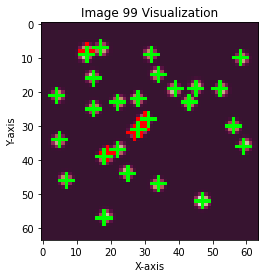

In [11]:
result2.show_error(images_30, found_30)

### Simple Local Meximum Approach with Filtering

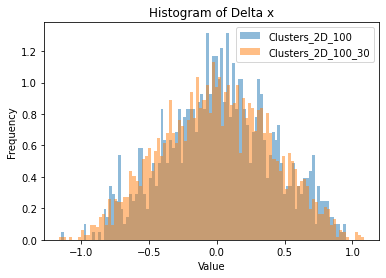

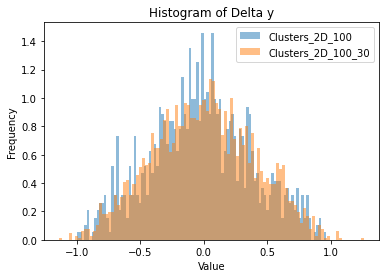

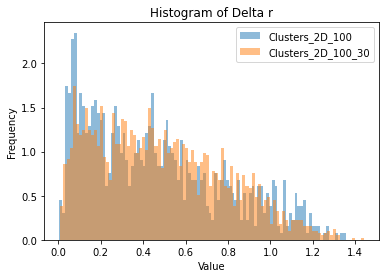

In [12]:
images = read_in_data('./Clusters_2D_100.txt')
found = get_float_result(images, find_points(images, 'local maxima denoised'))
result1 = judge(images, found)
images_30 = read_in_data('./Clusters_2D_100_30.txt')
found_30 = get_float_result(images_30, find_points(images_30, 'local maxima denoised'))
result2 = judge(images_30, found_30)

# Plot the histograms with specified border colors and transparent fills
plt.hist(result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

Image 7 Raw Data
Not Found: (7, 5)
[[ 854. 1175. 1254.  704.  192.]
 [3397. 3693. 3790. 2230.  533.]
 [4932. 4867. 4561. 2644.  638.]
 [2857. 2550. 2253. 1212.  288.]
 [ 683.  514.  428.  215.   53.]]


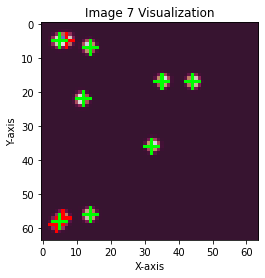

Image 22 Raw Data
Not Found: (25, 22)
[[ 145.  355.  373.  154.   40.]
 [ 746. 1853. 1970.  803.  138.]
 [1456. 3917. 4116. 1903.  352.]
 [1257. 3667. 4630. 2576.  693.]
 [ 647. 2518. 4650. 3839. 1221.]]


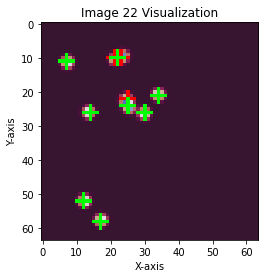

Image 22 Raw Data
Not Found: (23, 10)
[[ 414.  803. 1381. 1253.  480.]
 [1922. 3094. 4052. 3426. 1248.]
 [4128. 5091. 4920. 3548. 1312.]
 [3608. 3591. 2573. 1550.  537.]
 [1250. 1184.  640.  291.  103.]]


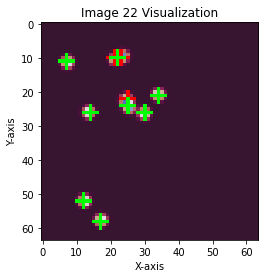

Image 34 Raw Data
Not Found: (30, 27)
[[2214. 4343. 3267.  973.  116.]
 [1717. 4065. 3814. 1460.  240.]
 [1516. 3859. 3878. 1605.  306.]
 [ 692. 1756. 1880.  776.  121.]
 [ 131.  362.  372.  133.   26.]]


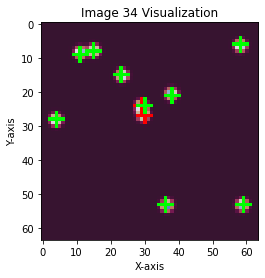

Image 49 Raw Data
Not Found: (48, 17)
[[  31.  192.  444.  380.  122.]
 [ 227.  959. 2078. 1782.  676.]
 [ 964. 2443. 4249. 3563. 1311.]
 [2707. 4111. 4405. 3066. 1039.]
 [3834. 4533. 2725. 1185.  331.]]


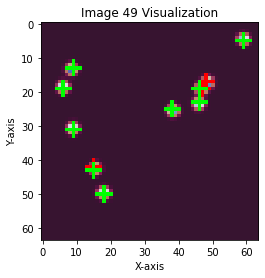

Image 67 Raw Data
Not Found: (14, 34)
[[  74.  496. 1850. 3686. 3273.]
 [ 352. 1519. 3664. 5035. 3877.]
 [ 672. 2728. 4968. 4347. 2319.]
 [ 569. 2140. 3506. 2404.  822.]
 [ 154.  710. 1154.  750.  215.]]


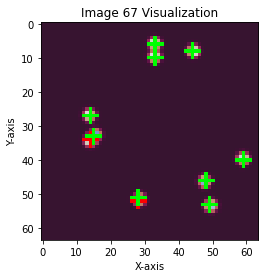

Image 71 Raw Data
Not Found: (7, 27)
[[ 327. 1159. 2301. 3720. 3804.]
 [ 893. 2985. 4717. 5099. 4269.]
 [1028. 3185. 4580. 3380. 2027.]
 [ 416. 1435. 1945. 1100.  430.]
 [  66.  259.  291.  223.   53.]]


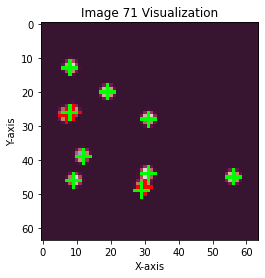

Image 93 Raw Data
Not Found: (44, 16)
[[  22.  124.  298.  382.  486.]
 [ 135.  801. 1775. 2048. 2318.]
 [ 298. 1718. 4046. 4520. 4619.]
 [ 274. 1635. 3709. 3953. 3706.]
 [  92.  576. 1285. 1462. 1207.]]


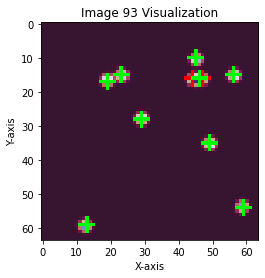

Image 97 Raw Data
Not Found: (31, 18)
[[  55.  239.  440.  306.  111.]
 [ 277. 1176. 2217. 1682.  545.]
 [ 942. 2867. 4619. 3420. 1039.]
 [2219. 4498. 4902. 3019.  828.]
 [2866. 4912. 3744. 1445.  293.]]


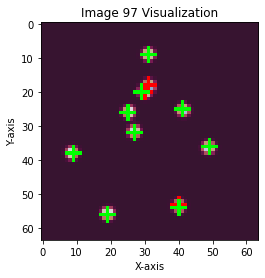

In [13]:
result1.show_error(images, found)

Image 0 Raw Data
Not Found: (35, 6)
[[ 308. 1024. 1453.  872.  191.]
 [1171. 3037. 3963. 2216.  516.]
 [2545. 4879. 5334. 2612.  590.]
 [3430. 5374. 4297. 1547.  281.]
 [2398. 3566. 2359.  664.   87.]]


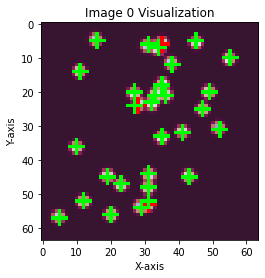

Image 1 Raw Data
Not Found: (55, 6)
[[  22.  122.  297.  214.   83.]
 [ 135.  752. 1648. 1515.  579.]
 [ 306. 1739. 3839. 3771. 1918.]
 [ 306. 1644. 3748. 4408. 3823.]
 [ 114.  629. 1753. 3214. 4741.]]


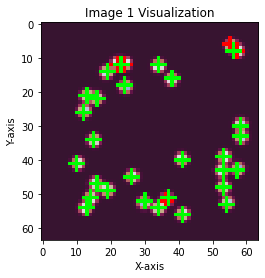

Image 3 Raw Data
Not Found: (49, 48)
[[2725. 1199. 1460. 1207.  439.]
 [1634. 2046. 3893. 3438. 1139.]
 [ 669. 2412. 5274. 4695. 1626.]
 [ 401. 2283. 5351. 4821. 1721.]
 [ 348. 1940. 4209. 3812. 1403.]]


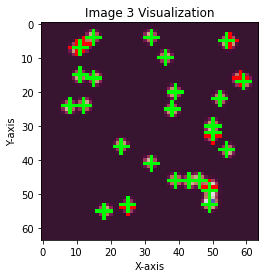

Image 6 Raw Data
Not Found: (25, 30)
[[ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]
 [6788. 4932. 4043. 1759.  379.]
 [3403. 1945. 1356.  581.   85.]]


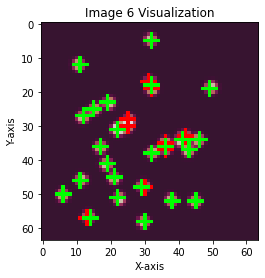

Image 6 Raw Data
Not Found: (25, 28)
[[  33.  129.  296.  270.   91.]
 [ 149.  787. 1692. 1483.  557.]
 [ 626. 2015. 4170. 3544. 1247.]
 [2420. 3583. 5258. 3873. 1311.]
 [5984. 5519. 5309. 2937.  735.]]


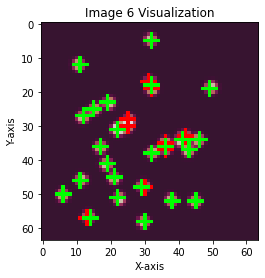

Image 7 Raw Data
Not Found: (20, 54)
[[6188. 5693. 3841. 1848.  574.]
 [4391. 4767. 5129. 3730. 1365.]
 [1366. 2299. 4012. 3695. 1423.]
 [ 226.  766. 1560. 1577.  577.]
 [  21.  113.  274.  245.  100.]]


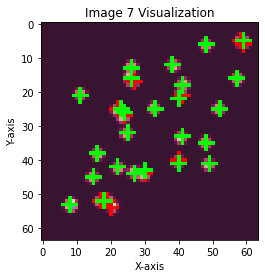

Image 8 Raw Data
Not Found: (48, 28)
[[1087. 1108.  922.  427.   87.]
 [4571. 4228. 3486. 1549.  317.]
 [8552. 7325. 5042. 2181.  391.]
 [7362. 5437. 3128. 1280.  252.]
 [3293. 2674. 1535.  527.   86.]]


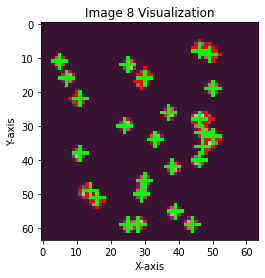

Image 8 Raw Data
Not Found: (29, 17)
[[ 202. 1030. 3214. 4598. 2795.]
 [ 369. 1899. 4749. 5235. 2636.]
 [ 622. 2616. 5188. 4317. 1576.]
 [ 389. 1703. 3128. 2272.  669.]
 [ 107.  454.  864.  611.  179.]]


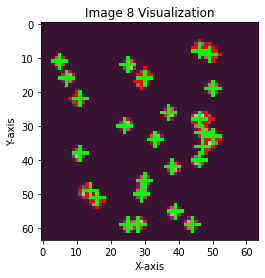

Image 10 Raw Data
Not Found: (35, 42)
[[ 440. 1163. 1460.  697.  119.]
 [1062. 3282. 3694. 1778.  312.]
 [1526. 4238. 4510. 2029.  369.]
 [2178. 4587. 4006. 1484.  231.]
 [2306. 4425. 3466. 1108.  130.]]


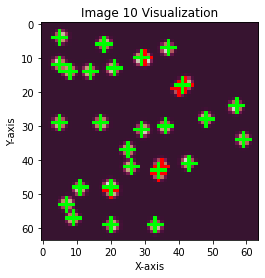

Image 11 Raw Data
Not Found: (45, 42)
[[  16.  114.  253.  247.   93.]
 [ 133.  699. 1570. 1472.  580.]
 [ 327. 1742. 4041. 3934. 1937.]
 [ 334. 2073. 5088. 5777. 4079.]
 [ 207. 1624. 4549. 6445. 6016.]]


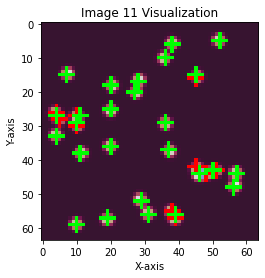

Image 11 Raw Data
Not Found: (38, 55)
[[ 188.  493.  548.  247.   59.]
 [ 732. 2119. 2481. 1071.  252.]
 [1310. 3800. 4433. 2360.  567.]
 [ 898. 3048. 4460. 3655. 1432.]
 [ 348. 1545. 3883. 4572. 2398.]]


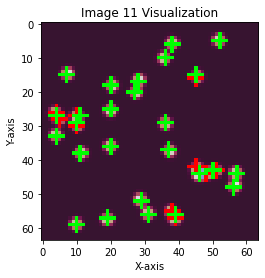

Image 11 Raw Data
Not Found: (48, 44)
[[3934. 1937.  869. 1026. 2037.]
 [5777. 4079. 3193. 2637. 4047.]
 [6445. 6016. 4932. 3323. 3253.]
 [4298. 4120. 3274. 1830. 1120.]
 [1353. 1164.  868.  435.  146.]]


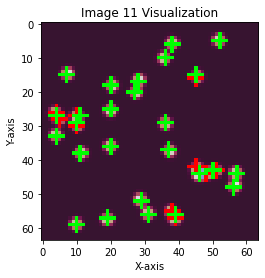

Image 12 Raw Data
Not Found: (21, 13)
[[  93.  314.  461.  235.   29.]
 [ 538. 1573. 2198. 1131.  248.]
 [1231. 3632. 4416. 2306.  454.]
 [2138. 4558. 4599. 2078.  423.]
 [2895. 4988. 3746. 1252.  198.]]


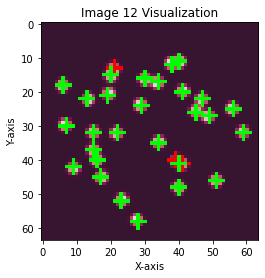

Image 17 Raw Data
Not Found: (22, 35)
[[  90.  216.  303.  203.   59.]
 [ 618. 1431. 1842. 1142.  328.]
 [2463. 4362. 5066. 3054.  802.]
 [4040. 6339. 5680. 3048.  776.]
 [2848. 3804. 2869. 1252.  284.]]


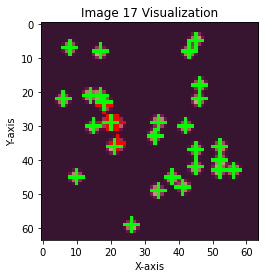

Image 17 Raw Data
Not Found: (22, 29)
[[1227. 1034.  578.  203.   45.]
 [5153. 4832. 2937. 1029.  161.]
 [8704. 8514. 5680. 2190.  402.]
 [5973. 6389. 4639. 1854.  373.]
 [1641. 1875. 1477.  638.  105.]]


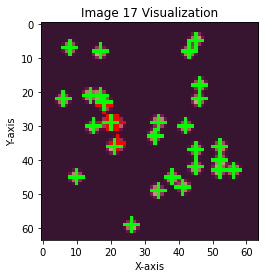

Image 18 Raw Data
Not Found: (33, 36)
[[6863. 9362. 5435. 1437.  179.]
 [5580. 8049. 5537. 1999.  340.]
 [3465. 6187. 5611. 2444.  473.]
 [1226. 2647. 3077. 1454.  299.]
 [ 208.  574.  730.  373.   89.]]


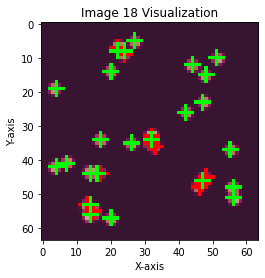

Image 18 Raw Data
Not Found: (46, 48)
[[ 283. 1576. 4319. 6576. 5090.]
 [ 844. 3262. 6323. 6522. 3446.]
 [1171. 3871. 5678. 4428. 1670.]
 [ 660. 2087. 2766. 1674.  486.]
 [ 136.  444.  590.  340.   59.]]


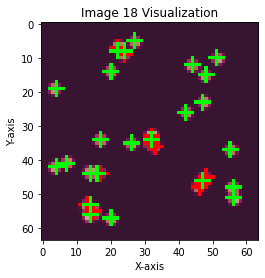

Image 18 Raw Data
Not Found: (15, 55)
[[4181. 2865. 1038.  352.  103.]
 [3970. 3409. 2523. 1630.  520.]
 [2928. 4118. 4807. 3508. 1167.]
 [3757. 5518. 5099. 3292. 1094.]
 [3327. 4244. 2822. 1314.  471.]]


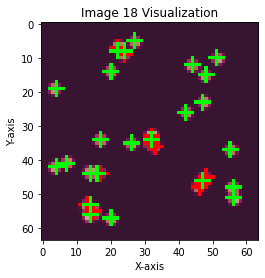

Image 19 Raw Data
Not Found: (24, 45)
[[  72.  678. 2477. 4233. 3031.]
 [ 273. 1557. 4335. 5702. 3359.]
 [ 401. 2244. 4967. 4816. 2203.]
 [ 319. 1609. 3320. 2980. 1245.]
 [ 103.  476. 1152. 1678. 1795.]]


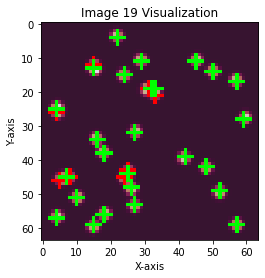

Image 19 Raw Data
Not Found: (5, 46)
[[ 124.  614. 1443. 2100. 2835.]
 [ 289. 1517. 3680. 4646. 5039.]
 [ 309. 1697. 3865. 4359. 3719.]
 [ 131.  736. 1624. 1774. 1145.]
 [  21.  115.  262.  264.  143.]]


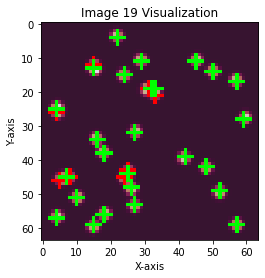

Image 22 Raw Data
Not Found: (18, 22)
[[ 166.  572. 1961. 3868. 3486.]
 [ 223. 1142. 3121. 4810. 3649.]
 [ 472. 2230. 4497. 4323. 2233.]
 [ 452. 2141. 4013. 3078. 1032.]
 [ 174.  821. 1454. 1106.  361.]]


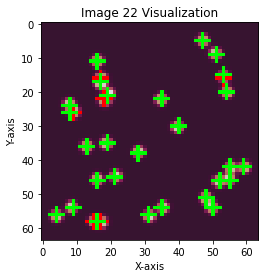

Image 25 Raw Data
Not Found: (13, 52)
[[ 784. 3029. 4438. 2549.  588.]
 [1051. 3745. 5146. 2936.  614.]
 [1258. 4194. 4968. 2592.  498.]
 [1215. 3333. 3860. 1746.  331.]
 [1107. 1393. 1507.  683.  102.]]


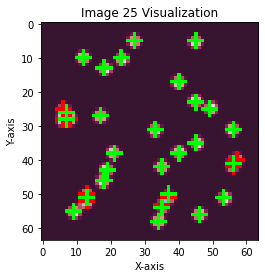

Image 29 Raw Data
Not Found: (37, 50)
[[ 240.  608.  780.  316.   47.]
 [1458. 2721. 2717. 1086.  181.]
 [3801. 5010. 4475. 1770.  278.]
 [5278. 4735. 2995. 1116.  195.]
 [3293. 2351.  946.  305.   39.]]


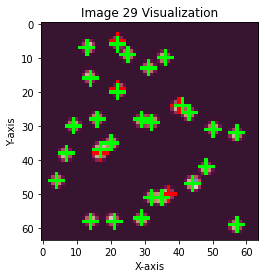

Image 30 Raw Data
Not Found: (5, 12)
[[ 264. 1568. 3987. 4709. 2352.]
 [ 714. 2590. 4598. 3972. 1631.]
 [ 971. 3226. 4593. 2868. 1106.]
 [ 528. 1962. 2703. 1531.  720.]
 [ 137.  465.  646.  312.  203.]]


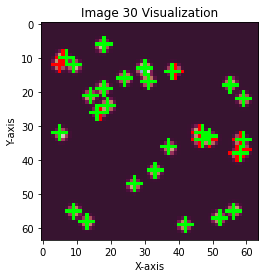

Image 31 Raw Data
Not Found: (54, 25)
[[1007.  578.  790.  592.  175.]
 [ 808. 1802. 2954. 2161.  634.]
 [2624. 3689. 4697. 3136.  948.]
 [6593. 5740. 3840. 2006.  563.]
 [8257. 5985. 2167.  606.  147.]]


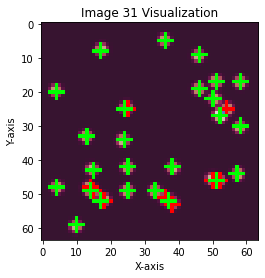

Image 34 Raw Data
Not Found: (12, 7)
[[1415. 4143. 4764. 2262.  398.]
 [1618. 4399. 4813. 2066.  372.]
 [1689. 4303. 4469. 1884.  260.]
 [1072. 2754. 2779. 1106.  186.]
 [ 287.  765.  727.  297.   53.]]


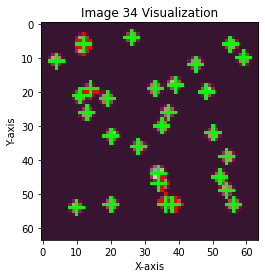

Image 35 Raw Data
Not Found: (55, 7)
[[  88.  276.  358.  190.   44.]
 [ 446. 1477. 1965. 1007.  192.]
 [1079. 3280. 4278. 2262.  462.]
 [1540. 3909. 4599. 2569.  754.]
 [2298. 4667. 5082. 3545. 1769.]]


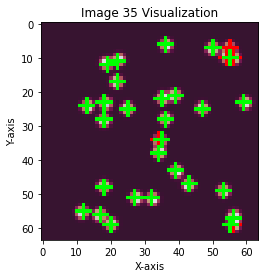

Image 38 Raw Data
Not Found: (53, 30)
[[  70.  296.  793. 1181.  811.]
 [ 360. 1582. 3307. 4087. 2717.]
 [ 903. 3300. 6065. 6348. 3653.]
 [ 801. 3129. 4950. 4271. 2080.]
 [ 346. 1120. 1660. 1236.  519.]]


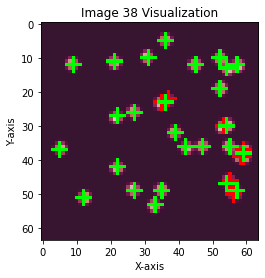

Image 38 Raw Data
Not Found: (58, 39)
[[1411. 1417. 3421. 5560. 4460.]
 [1024. 3049. 6488. 7847. 5005.]
 [ 841. 3474. 7081. 7480. 4257.]
 [ 382. 1740. 3503. 4094. 2218.]
 [  68.  330.  726.  901.  541.]]


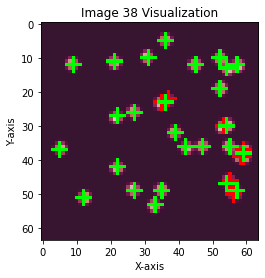

Image 39 Raw Data
Not Found: (55, 15)
[[  94.  301.  346.  174.   40.]
 [ 469. 1591. 1906.  992.  206.]
 [1355. 3578. 4206. 2299.  592.]
 [2477. 4574. 4906. 3309. 1480.]
 [4048. 5014. 4633. 4695. 3002.]]


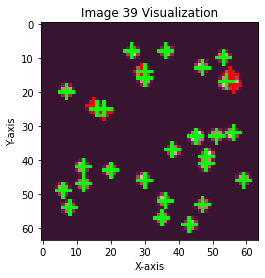

Image 39 Raw Data
Not Found: (56, 18)
[[4574. 4906. 3309. 1480.  327.]
 [5014. 4633. 4695. 3002.  799.]
 [3869. 3643. 4127. 2908.  869.]
 [1393. 1336. 1676. 1126.  333.]
 [ 198.  209.  241.  190.   54.]]


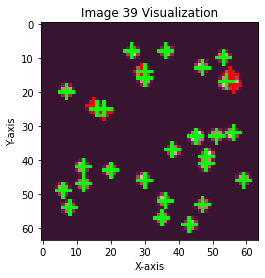

Image 41 Raw Data
Not Found: (51, 44)
[[ 170.  544.  764.  410.   86.]
 [ 685. 2157. 2917. 1611.  328.]
 [1551. 3842. 4633. 2443.  508.]
 [3102. 4746. 3850. 1637.  353.]
 [3816. 4542. 2435.  656.   97.]]


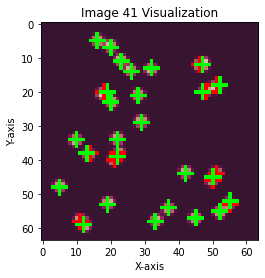

Image 41 Raw Data
Not Found: (21, 40)
[[ 172.  812. 2394. 4382. 3986.]
 [ 586. 2242. 4280. 4767. 3321.]
 [ 768. 3023. 4683. 3508. 1409.]
 [ 439. 1646. 2592. 1546.  452.]
 [  79.  388.  586.  342.   72.]]


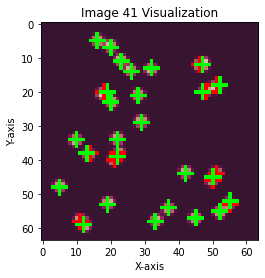

Image 43 Raw Data
Not Found: (39, 28)
[[ 219.  379.  791. 1114. 1873.]
 [ 464. 1674. 3047. 4111. 5883.]
 [ 669. 2743. 4889. 5921. 7497.]
 [ 425. 1875. 3340. 3558. 3779.]
 [ 138.  500.  876.  890.  822.]]


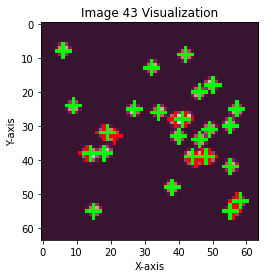

Image 47 Raw Data
Not Found: (35, 27)
[[2951. 4510. 3287. 1168.  193.]
 [1773. 3800. 4364. 2183.  437.]
 [ 973. 3185. 4305. 2409.  558.]
 [ 383. 1462. 2076. 1137.  260.]
 [  85.  275.  383.  221.   63.]]


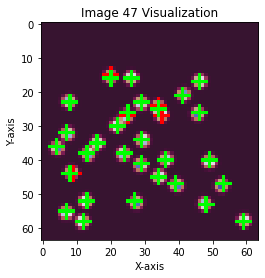

Image 50 Raw Data
Not Found: (32, 56)
[[ 393.  317.  323.  206.   94.]
 [2217. 1961. 1846. 1199.  415.]
 [4590. 4449. 4350. 2875.  787.]
 [4041. 3931. 4286. 2811.  790.]
 [1361. 1521. 1541. 1020.  322.]]


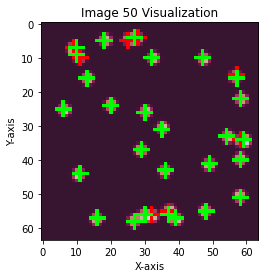

Image 50 Raw Data
Not Found: (25, 5)
[[ 137.  754. 1541. 1704. 1809.]
 [ 339. 1844. 3983. 4092. 4313.]
 [ 389. 1905. 3920. 3985. 3911.]
 [ 147.  762. 1558. 1606. 1431.]
 [  20.  115.  233.  240.  202.]]


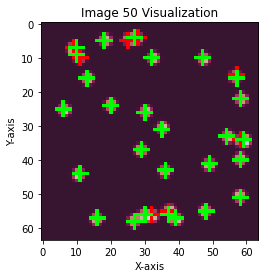

Image 51 Raw Data
Not Found: (57, 12)
[[  22.  168.  338.  275.   99.]
 [ 177.  921. 1753. 1522.  665.]
 [ 449. 2074. 4294. 3997. 2645.]
 [ 407. 2009. 4114. 4930. 4931.]
 [ 147.  721. 1822. 3022. 3947.]]


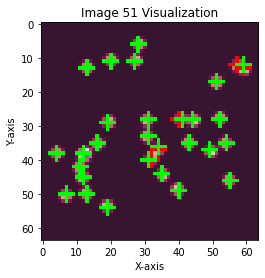

Image 52 Raw Data
Not Found: (39, 19)
[[ 321.  871. 1114.  557.  110.]
 [1175. 3170. 3652. 1710.  331.]
 [2753. 5254. 5347. 2267.  432.]
 [3892. 5827. 4209. 1450.  219.]
 [2903. 3655. 2188.  538.   57.]]


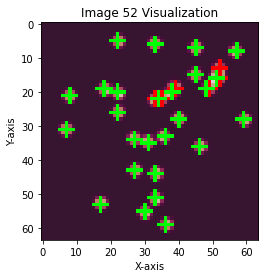

Image 52 Raw Data
Not Found: (52, 13)
[[ 101.  324.  434.  221.   41.]
 [ 517. 1677. 2029. 1049.  216.]
 [1136. 3440. 4376. 2105.  386.]
 [1554. 4124. 4682. 2328.  426.]
 [2784. 5882. 5633. 2370.  423.]]


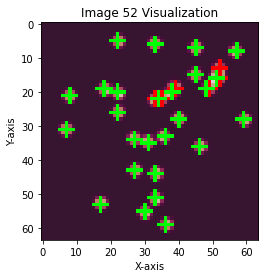

Image 53 Raw Data
Not Found: (30, 33)
[[  91.  588. 1283. 1830. 2775.]
 [ 298. 1557. 3609. 4227. 4376.]
 [ 341. 1757. 3979. 4010. 3046.]
 [ 181.  814. 1714. 1650.  957.]
 [ 147.  170.  336.  280.  169.]]


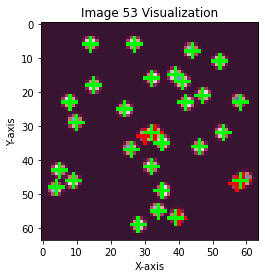

Image 59 Raw Data
Not Found: (44, 47)
[[ 229.  641.  928.  542.  148.]
 [1129. 2645. 3309. 1834.  413.]
 [3219. 5358. 5310. 2714.  588.]
 [4467. 5527. 4049. 1647.  359.]
 [2566. 2882. 1640.  498.   87.]]


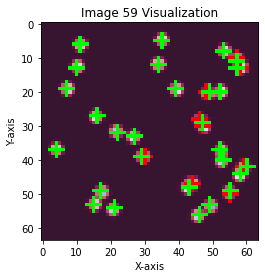

Image 60 Raw Data
Not Found: (6, 4)
[[ 230.  287.  305.  472.  943.]
 [1660. 1916. 1846. 1898. 3076.]
 [4541. 4924. 4205. 3295. 4318.]
 [5094. 5082. 4022. 2380. 2346.]
 [2377. 2034. 1575.  788.  509.]]


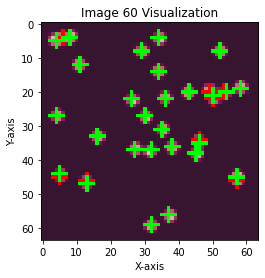

Image 60 Raw Data
Not Found: (49, 20)
[[ 213.  919. 1468.  993.  310.]
 [ 558. 2364. 3955. 2745.  900.]
 [ 634. 2500. 4326. 3591. 1880.]
 [ 264. 1269. 3189. 4433. 3318.]
 [  80.  577. 2243. 4295. 3644.]]


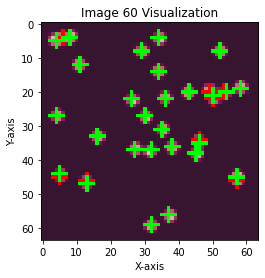

Image 62 Raw Data
Not Found: (49, 54)
[[  54.  236.  401.  261.   99.]
 [ 296. 1241. 2053. 1368.  591.]
 [ 882. 3085. 4801. 3071. 1361.]
 [2049. 5053. 6303. 3910. 1491.]
 [3743. 7437. 7437. 3835. 1073.]]


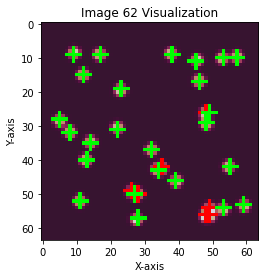

Image 62 Raw Data
Not Found: (35, 42)
[[ 193.  329.  332.  171.   41.]
 [1145. 2096. 2302. 1154.  250.]
 [3447. 5830. 5569. 2823.  592.]
 [4147. 6415. 5590. 2628.  569.]
 [2007. 2995. 2330. 1060.  258.]]


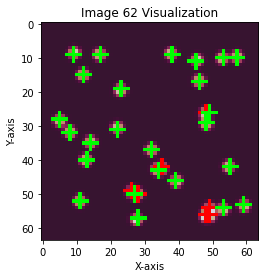

Image 62 Raw Data
Not Found: (48, 56)
[[ 129.  882. 3085. 4801. 3071.]
 [ 411. 2049. 5053. 6303. 3910.]
 [ 866. 3743. 7437. 7437. 3835.]
 [ 815. 3349. 6201. 5876. 2796.]
 [ 296. 1129. 2197. 2022.  959.]]


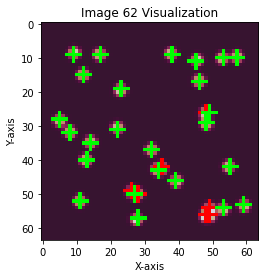

Image 62 Raw Data
Not Found: (49, 56)
[[ 882. 3085. 4801. 3071. 1361.]
 [2049. 5053. 6303. 3910. 1491.]
 [3743. 7437. 7437. 3835. 1073.]
 [3349. 6201. 5876. 2796.  642.]
 [1129. 2197. 2022.  959.  219.]]


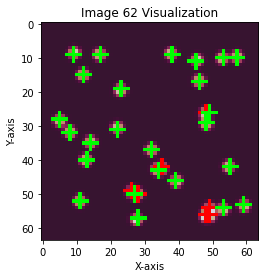

Image 63 Raw Data
Not Found: (9, 55)
[[ 125.  377.  413.  227.   91.]
 [ 911. 2319. 2571. 1221.  235.]
 [2580. 6004. 6210. 2824.  551.]
 [3198. 6966. 6402. 2666.  544.]
 [1761. 3340. 2897. 1102.  197.]]


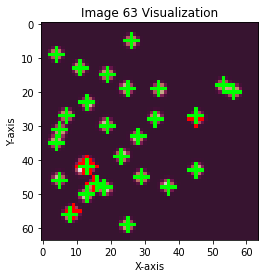

Image 65 Raw Data
Not Found: (51, 48)
[[  35.  187.  503. 1178. 2465.]
 [ 228. 1138. 2362. 3574. 5225.]
 [ 496. 2371. 5101. 6585. 6777.]
 [ 470. 2095. 4685. 6068. 5561.]
 [ 170.  792. 1747. 2662. 2669.]]


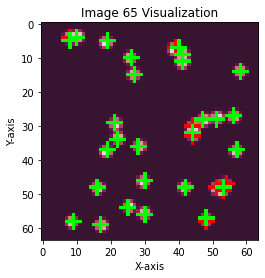

Image 65 Raw Data
Not Found: (44, 30)
[[  43.  209.  439.  601. 1759.]
 [ 207. 1120. 2085. 1821. 1676.]
 [ 506. 2364. 4383. 3325. 1355.]
 [ 505. 2427. 4656. 3564. 1155.]
 [ 458. 2385. 4671. 3776. 1234.]]


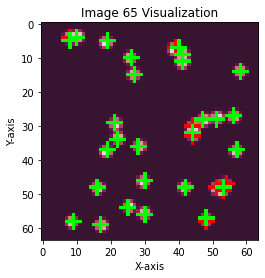

Image 73 Raw Data
Not Found: (58, 11)
[[ 512. 1350. 1673.  739.  159.]
 [1499. 3427. 3773. 1771.  332.]
 [3350. 4736. 4285. 1888.  337.]
 [5204. 4330. 2364.  847.  132.]
 [4258. 2685.  922.  195.   22.]]


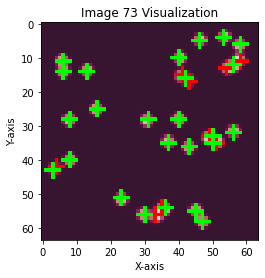

Image 73 Raw Data
Not Found: (54, 13)
[[  74.  335.  895. 1816. 3350.]
 [ 316. 1463. 3056. 4230. 5204.]
 [ 560. 2486. 4762. 5037. 4258.]
 [ 335. 1578. 3063. 2720. 1641.]
 [  93.  421.  784.  629.  328.]]


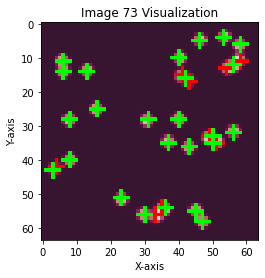

Image 73 Raw Data
Not Found: (33, 56)
[[ 385.  221.  779. 3468. 7370.]
 [1380. 1036. 1992. 3982. 6616.]
 [2267. 1966. 3820. 4377. 3180.]
 [1428. 1774. 3564. 3333. 1416.]
 [ 375.  638. 1363. 1245.  481.]]


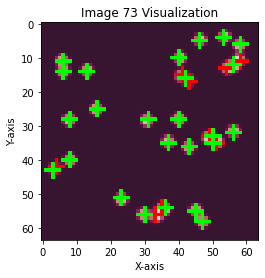

Image 74 Raw Data
Not Found: (31, 14)
[[  87.  225.  430.  337.  154.]
 [ 680. 1262. 2108. 1788.  802.]
 [2802. 3558. 4446. 3726. 2343.]
 [4589. 4481. 4114. 3523. 3640.]
 [3172. 2664. 1670. 1566. 2738.]]


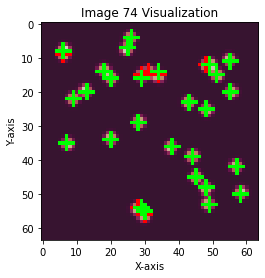

Image 76 Raw Data
Not Found: (27, 51)
[[ 456. 1329. 3780. 4411. 2179.]
 [ 987. 2147. 5016. 5158. 2186.]
 [1090. 2548. 5095. 4336. 1537.]
 [ 597. 1711. 3290. 2640.  795.]
 [ 131.  507.  957.  730.  203.]]


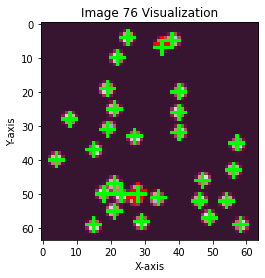

Image 77 Raw Data
Not Found: (53, 48)
[[ 155.  971. 3333. 4719. 2613.]
 [ 506. 2168. 5361. 6235. 3089.]
 [1608. 3828. 5926. 5050. 2148.]
 [3215. 5128. 4764. 2917.  929.]
 [2995. 4080. 2538.  853.  229.]]


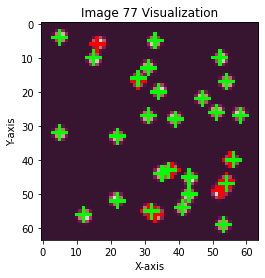

Image 77 Raw Data
Not Found: (16, 6)
[[  74.  456. 1157. 1192.  479.]
 [ 233. 1322. 3314. 3212. 1314.]
 [ 224. 1421. 3697. 3697. 1406.]
 [ 113.  683. 1706. 1609.  646.]
 [ 186.  406.  505.  388.  133.]]


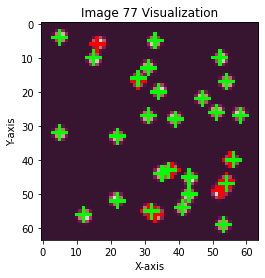

Image 77 Raw Data
Not Found: (52, 49)
[[  85.  506. 2168. 5361. 6235.]
 [ 420. 1608. 3828. 5926. 5050.]
 [1009. 3215. 5128. 4764. 2917.]
 [ 890. 2995. 4080. 2538.  853.]
 [ 342. 1141. 1433.  745.  183.]]


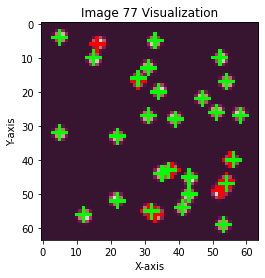

Image 78 Raw Data
Not Found: (18, 48)
[[ 148.  429.  651.  482.  125.]
 [ 996. 2049. 2734. 1970.  555.]
 [3409. 4491. 5026. 3171.  923.]
 [6362. 5693. 3983. 2250.  592.]
 [6734. 4344. 1705.  609.  162.]]


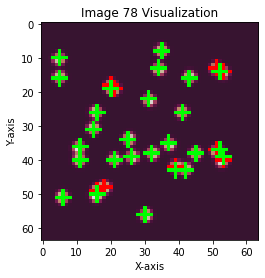

Image 78 Raw Data
Not Found: (53, 14)
[[2342. 1566.  561.  204.   45.]
 [4674. 3659. 2282. 1057.  237.]
 [3808. 4526. 4499. 2417.  560.]
 [1586. 3111. 3970. 2320.  551.]
 [ 362.  990. 1485.  933.  225.]]


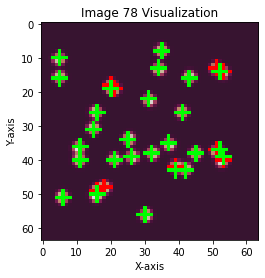

Image 79 Raw Data
Not Found: (53, 25)
[[ 262. 1251. 3292. 4967. 4035.]
 [ 643. 2721. 4880. 4958. 2956.]
 [ 675. 2643. 4208. 2950. 1204.]
 [ 297. 1049. 1712. 1041.  286.]
 [ 221.  180.  254.  140.   32.]]


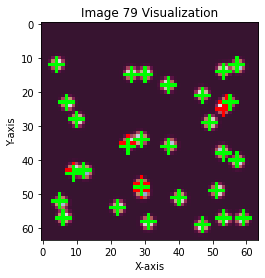

Image 80 Raw Data
Not Found: (55, 41)
[[ 207.  648.  763.  418.   71.]
 [ 812. 2367. 2870. 1445.  279.]
 [1170. 3772. 4701. 2471.  528.]
 [ 919. 3232. 4868. 3058.  852.]
 [ 577. 2597. 4911. 3500. 1142.]]


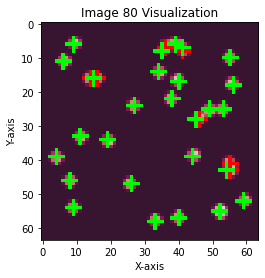

Image 82 Raw Data
Not Found: (5, 44)
[[  96.  576. 1049.  787.  257.]
 [ 368. 1835. 3597. 2917.  987.]
 [ 563. 2785. 5867. 4793. 1508.]
 [ 494. 2724. 5869. 4950. 1766.]
 [ 312. 1726. 3916. 3517. 1249.]]


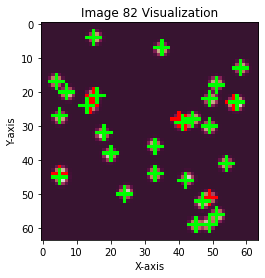

Image 82 Raw Data
Not Found: (49, 51)
[[ 143.  428.  563.  266.   58.]
 [ 796. 2046. 2495. 1324.  294.]
 [2522. 4094. 4323. 2314.  434.]
 [4638. 4403. 3519. 1557.  311.]
 [4128. 2646. 1235.  452.  134.]]


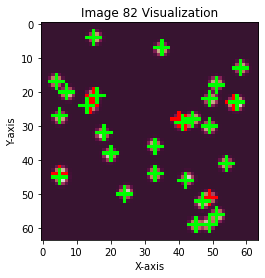

Image 83 Raw Data
Not Found: (43, 47)
[[  34.  185.  448.  491.  238.]
 [ 224. 1214. 2578. 2908. 1595.]
 [ 576. 2850. 6236. 6740. 3695.]
 [ 767. 2772. 5829. 6236. 3454.]
 [1132. 1224. 2250. 2276. 1208.]]


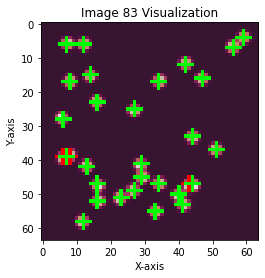

Image 86 Raw Data
Not Found: (10, 33)
[[  34.  173.  375.  437.  435.]
 [ 175.  848. 2003. 2232. 2250.]
 [ 328. 1831. 4123. 4416. 4598.]
 [ 276. 1497. 3391. 3702. 3621.]
 [  68.  496. 1104. 1155. 1154.]]


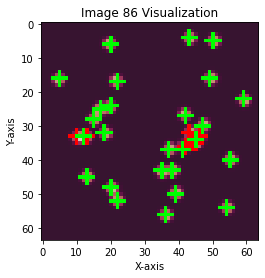

Image 86 Raw Data
Not Found: (43, 32)
[[  64.  303.  704.  769.  644.]
 [ 157. 1082. 2731. 2667. 1377.]
 [ 250. 1607. 4039. 4439. 3024.]
 [ 210. 1185. 3304. 4674. 5710.]
 [ 606. 1386. 3363. 6567. 8464.]]


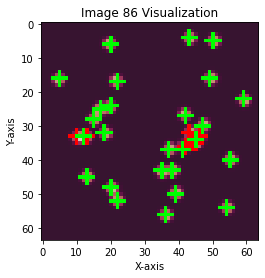

Image 89 Raw Data
Not Found: (59, 50)
[[ 620. 2767. 4750. 3334.  941.]
 [ 548. 2555. 4594. 3236.  951.]
 [ 549. 2569. 4583. 3514. 1013.]
 [ 315. 1531. 2845. 2121.  677.]
 [  73.  366.  744.  562.  162.]]


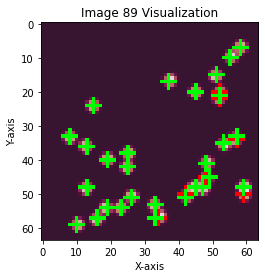

Image 90 Raw Data
Not Found: (21, 6)
[[ 227.  573.  652.  260.   40.]
 [ 891. 2364. 2546. 1080.  195.]
 [1506. 3969. 4393. 1955.  343.]
 [1305. 3736. 4628. 2256.  454.]
 [ 955. 3503. 4859. 2709.  648.]]


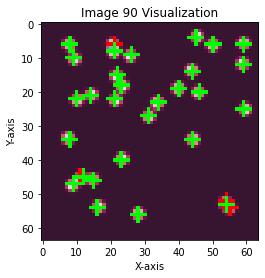

Image 91 Raw Data
Not Found: (33, 38)
[[1531. 5581. 8140. 4964. 1183.]
 [ 985. 3952. 6135. 4100. 1073.]
 [ 509. 2426. 5023. 4093. 1349.]
 [ 310. 1660. 3620. 3351. 1179.]
 [  95.  558. 1238. 1177.  409.]]


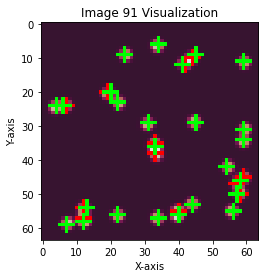

Image 92 Raw Data
Not Found: (52, 8)
[[  97.  398. 1311. 3284. 4232.]
 [ 594. 1869. 3095. 3737. 3708.]
 [2016. 4875. 5777. 3696. 1690.]
 [3262. 6456. 6187. 2949.  672.]
 [2399. 4187. 3288. 1215.  216.]]


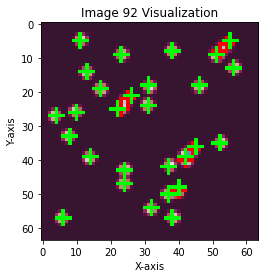

Image 94 Raw Data
Not Found: (4, 33)
[[ 970. 4098. 7617. 6012. 2138.]
 [1269. 4832. 7087. 4529. 1131.]
 [1196. 3894. 5108. 2558.  590.]
 [ 505. 1656. 2057. 1036.  218.]
 [  83.  327.  363.  170.   42.]]


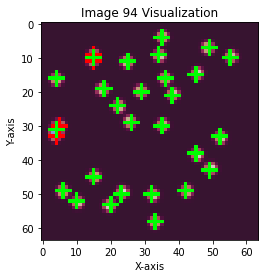

Image 99 Raw Data
Not Found: (19, 38)
[[ 110.  434.  594.  560. 1361.]
 [ 709. 2039. 2924. 1961. 1935.]
 [1937. 4984. 6003. 3318. 1443.]
 [2775. 6170. 6104. 2784.  716.]
 [1893. 3730. 3303. 1216.  222.]]


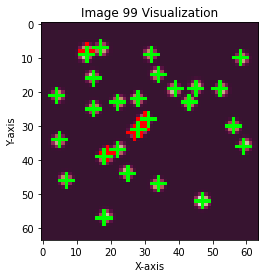

In [14]:
result2.show_error(images_30, found_30)

### Large Data Set

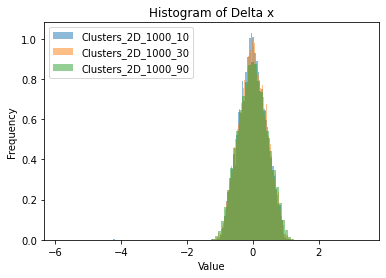

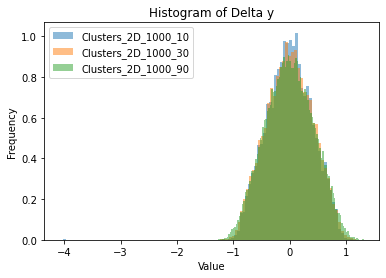

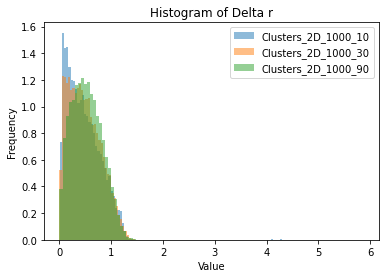

In [15]:
images = read_in_data('./Clusters_2D_1000_10.txt')
found = get_float_result(images, find_points(images, 'local maxima denoised'))
result1 = judge(images, found)
images_30 = read_in_data('./Clusters_2D_1000_30.txt')
found_30 = get_float_result(images_30, find_points(images_30, 'local maxima denoised'))
result2 = judge(images_30, found_30)
images_90 = read_in_data('./Clusters_2D_1000_90.txt')
found_90 = get_float_result(images_90, find_points(images_90, 'local maxima denoised'))
result3 = judge(images_90, found_90)

# Plot the histograms with specified border colors and transparent fills
plt.hist(result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_10')    # Histogram for data1
plt.hist(result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_30')    # Histogram for data2
plt.hist(result3.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_90')    # Histogram for data3
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper left')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_10')    # Histogram for data1
plt.hist(result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_30')    # Histogram for data2
plt.hist(result3.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_90')    # Histogram for data3
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper left')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_10')    # Histogram for data1
plt.hist(result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_30')    # Histogram for data2
plt.hist(result3.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_90')    # Histogram for data3
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

### Plot the distribution of max, sum3 and sum5

max: value of the highest pixel

sum3: sum of 3x3 pixels around the maximum

sum5: sum of 5x5 pixels around the maximum

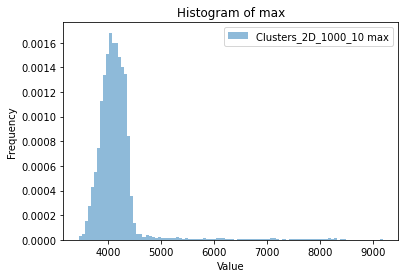

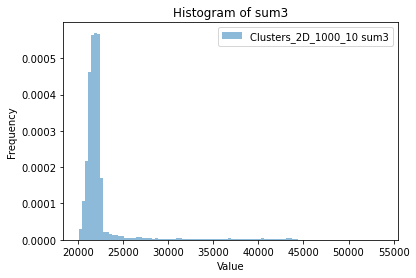

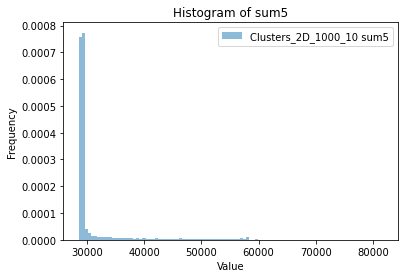

In [16]:
max_val = []
sum3 = []
sum5 = []
for i in range(len(images)):
    for j in range(len(images[i].cord_of_points)):
        max_val.append(np.sum(extract_subarr(images[i].raw_image, np.round(images[i].cord_of_points[j] - 0.5).astype(int), 0)))
        sum3.append(np.sum(extract_subarr(images[i].raw_image, np.round(images[i].cord_of_points[j] - 0.5).astype(int), 1)))
        sum5.append(np.sum(extract_subarr(images[i].raw_image, np.round(images[i].cord_of_points[j] - 0.5).astype(int), 2)))

plt.hist(max_val, bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_10 max')    # Histogram for data3
# Customize the plot
plt.title('Histogram of max')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

plt.hist(sum3, bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_10 sum3')    # Histogram for data3
# Customize the plot
plt.title('Histogram of sum3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

plt.hist(sum5, bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_10 sum5')    # Histogram for data3
# Customize the plot
plt.title('Histogram of sum5')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

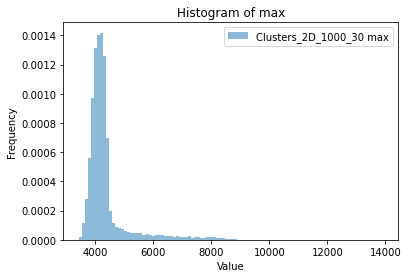

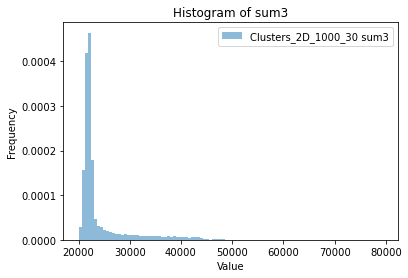

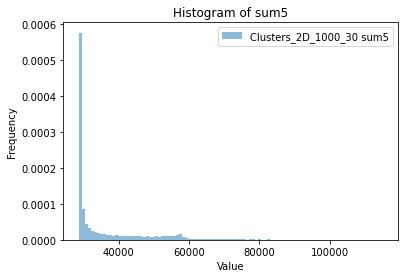

In [17]:
max_val = []
sum3 = []
sum5 = []

for i in range(len(images_30)):
    for j in range(len(images_30[i].cord_of_points)):
        max_val.append(np.sum(extract_subarr(images_30[i].raw_image, np.round(images_30[i].cord_of_points[j] - 0.5).astype(int), 0)))
        sum3.append(np.sum(extract_subarr(images_30[i].raw_image, np.round(images_30[i].cord_of_points[j] - 0.5).astype(int), 1)))
        sum5.append(np.sum(extract_subarr(images_30[i].raw_image, np.round(images_30[i].cord_of_points[j] - 0.5).astype(int), 2)))

plt.hist(max_val, bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_30 max')    # Histogram for data3
# Customize the plot
plt.title('Histogram of max')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

plt.hist(sum3, bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_30 sum3')    # Histogram for data3
# Customize the plot
plt.title('Histogram of sum3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

plt.hist(sum5, bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_30 sum5')    # Histogram for data3
# Customize the plot
plt.title('Histogram of sum5')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

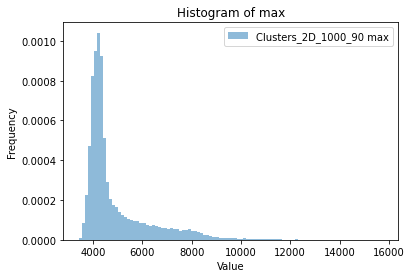

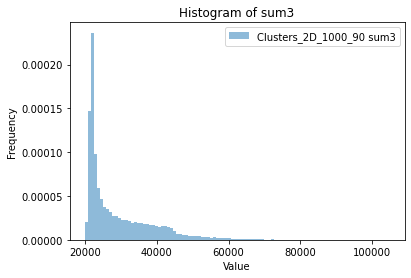

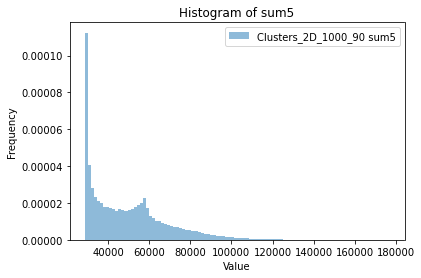

In [18]:
max_val = []
sum3 = []
sum5 = []

for i in range(len(images_90)):
    for j in range(len(images_90[i].cord_of_points)):
        max_val.append(np.sum(extract_subarr(images_90[i].raw_image, np.round(images_90[i].cord_of_points[j] - 0.5).astype(int), 0)))
        sum3.append(np.sum(extract_subarr(images_90[i].raw_image, np.round(images_90[i].cord_of_points[j] - 0.5).astype(int), 1)))
        sum5.append(np.sum(extract_subarr(images_90[i].raw_image, np.round(images_90[i].cord_of_points[j] - 0.5).astype(int), 2)))

plt.hist(max_val, bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_90 max')    # Histogram for data3
# Customize the plot
plt.title('Histogram of max')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

plt.hist(sum3, bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_90 sum3')    # Histogram for data3
# Customize the plot
plt.title('Histogram of sum3')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

plt.hist(sum5, bins=100, density=True, alpha=0.5, label='Clusters_2D_1000_90 sum5')    # Histogram for data3
# Customize the plot
plt.title('Histogram of sum5')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()